<a href="https://colab.research.google.com/github/BelenMataMoina/TFG-Belen-Mata/blob/main/Bel%C3%A9n_Mata_Mo%C3%ADna_tfg_Business_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats import anova
from statsmodels.stats.anova import AnovaRM
from scipy.stats import f
import pickle


#Datos 2017

In [2]:
df17= pd.read_csv("/2017.csv")

In [3]:
#Comprobación del número de filas y columnas que tiene el archivo
print("Tamaño del archivo:",df17.shape)
#Comprobacion del numero de valores NA
print(df17.isna().sum().head(5))
#Existen variables con muchos valores nulos o NA, se eliminan aquellas cuyos valores NA sean mayores al 85%
valor_max_na = (0.9 * len(df17))
df17 = df17.loc[:,(df17.isnull().sum(axis = 0) <= valor_max_na)] #se indica axis = 0 para tener en cuenta el número de valores nulos por columna, es decir, por variable.
print("Tamaño después de eliminar columnas de valores nulos:",df17.shape)
print(df17.keys())
print("---------------------------")

Tamaño del archivo: (756, 123)
#                                                                 0
<strong>Are you self-employed?</strong>                           0
How many employees does your company or organization have?      113
Is your employer primarily a tech company/organization?         113
Is your primary role within your company related to tech/IT?    113
dtype: int64
Tamaño después de eliminar columnas de valores nulos: (756, 84)
Index(['#', '<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part 

In [4]:
nombres_col17 = {
    '<strong>Are you self-employed?</strong>':'autonomo',
    'How many employees does your company or organization have?':'num_emp',
    'Is your employer primarily a tech company/organization?':'empresa_tec',
    'Is your primary role within your company related to tech/IT?':'puesto_tec',
    'Does your employer provide mental health benefits\xa0as part of healthcare coverage?':'beneficio',
    'Do you know the options for mental health care available under your employer-provided health coverage?':'info_opciones_sm',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'mencion_sm_empleador',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?':'oferta_recursos_sm',
    'Have you ever discussed your mental health with your employer?':'conv_sm_empleador',
    'Have you ever discussed your mental health with coworkers?':'conv_sm_comp',
    'Overall, how much importance does your employer place on physical health?':'imp_saludfisica',
    'Overall, how much importance does your employer place on mental health?':'imp_saludmental',
    'Did you ever discuss your mental health with your previous employer?':'conv_sm_antiguo_emp',
    'Did you ever discuss your mental health with a previous coworker(s)?':'conv_sm_antiguo_comp',
    'Do you currently have a mental health disorder?':'problema_sm_act',
    'Have you had a mental health disorder in the past?':'problema_sm_pasado',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?':'tratamiento_sm',
    'Do you have a family history of mental illness?':'historial_familiar',
    'How willing would you be to share with friends and family that you have a mental illness?':'entorno_familiar',
    'What is your age?':'edad',
    'What is your gender?':'sexo',
    'What country do you <strong>live</strong> in?':'pais'}


In [5]:
#selección de las columnas deseadas para hacer el análisis
col_selec = nombres_col17.keys()
df1 = df17[col_selec].copy()
#col_quitar = [item for item in df17.columns if item not in col_selec]
#df17.drop(columns = col_quitar, inplace = True, errors = 'ignore')
print('Tamaño sin columnas no deseadas: ', df1.shape)
print(df1.keys())

Tamaño sin columnas no deseadas:  (756, 22)
Index(['<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Have you ever discussed your mental health with your employer?',
       'Have you ever discussed your mental health with coworkers?',
       'Overall, how much importance does your employer place on physical health?',
     

In [6]:
#Renombramiento de las columnas para facilitar su tratamiento y análisis
df1.rename(columns = nombres_col17, inplace = True, errors = 'ignore')
print(df1.keys())

Index(['autonomo', 'num_emp', 'empresa_tec', 'puesto_tec', 'beneficio',
       'info_opciones_sm', 'mencion_sm_empleador', 'oferta_recursos_sm',
       'conv_sm_empleador', 'conv_sm_comp', 'imp_saludfisica',
       'imp_saludmental', 'conv_sm_antiguo_emp', 'conv_sm_antiguo_comp',
       'problema_sm_act', 'problema_sm_pasado', 'tratamiento_sm',
       'historial_familiar', 'entorno_familiar', 'edad', 'sexo', 'pais'],
      dtype='object')


## Tratamiento de las variables

###Variable puesto_tec

In [7]:
df1['puesto_tec'].value_counts()

puesto_tec
1.0    595
0.0     48
Name: count, dtype: int64

In [8]:
#Eliminar aquellos individuos que no tengan un puesto tecnológico
df1.drop(df1[df1['puesto_tec'] == 0.0].index, inplace = True)

### Variable sexo

In [9]:
df1['sexo'].value_counts()

sexo
Male                                                         317
male                                                          99
Female                                                        95
female                                                        54
M                                                             26
m                                                             21
F                                                             15
f                                                             11
Male                                                           6
Man                                                            3
Woman                                                          3
Nonbinary                                                      3
woman                                                          2
Female                                                         2
trans woman                                                    1
Non binary          

In [10]:
df1['sexo'] = df1['sexo'].str.lower().str.strip()

In [11]:
#Redistribución de la variable sexo para englobar dentro de hombre, mujer y otros
sexo_masculino = ['male', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male','male/androgynous','male (hey this is the tech industry you\'re talking about)','male, cis','homem cis']
sexo_femenino = ['female', 'f', 'woman', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female','female-ish','woman-identified']
sexo_otro = ['agender', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer']

df1['sexo'] = df1['sexo'].replace(sexo_masculino, 'Hombre')
df1['sexo'] = df1['sexo'].replace(sexo_femenino, 'Mujer')
df1['sexo'] = df1['sexo'].replace(sexo_otro, 'Otro')

df1['sexo'] = df1['sexo'].fillna('Otro')

df1['sexo'].value_counts()

sexo
Hombre    486
Mujer     194
Otro       28
Name: count, dtype: int64

###Variable edad

In [12]:
df1['edad'].describe()

count    706.000000
mean      35.066572
std        8.213626
min       18.000000
25%       29.000000
50%       34.000000
75%       40.000000
max       67.000000
Name: edad, dtype: float64

##Análisis general de los trabajadores en puestos tecnológicos, estudiando su distribución por sexo y edad.

In [13]:
df1['problema_sm_act'].describe()

count     708
unique      4
top       Yes
freq      302
Name: problema_sm_act, dtype: object

In [14]:
colors = sns.color_palette('pastel')[0:6]

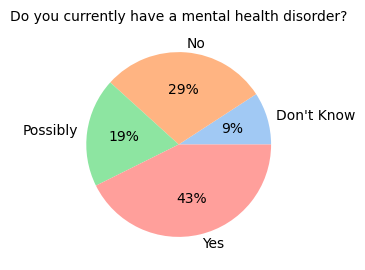

In [15]:
pie1= df1.groupby(['problema_sm_act']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you currently have a mental health disorder?', colors = colors, figsize=(3,3))
pie1.title.set_fontsize(10)


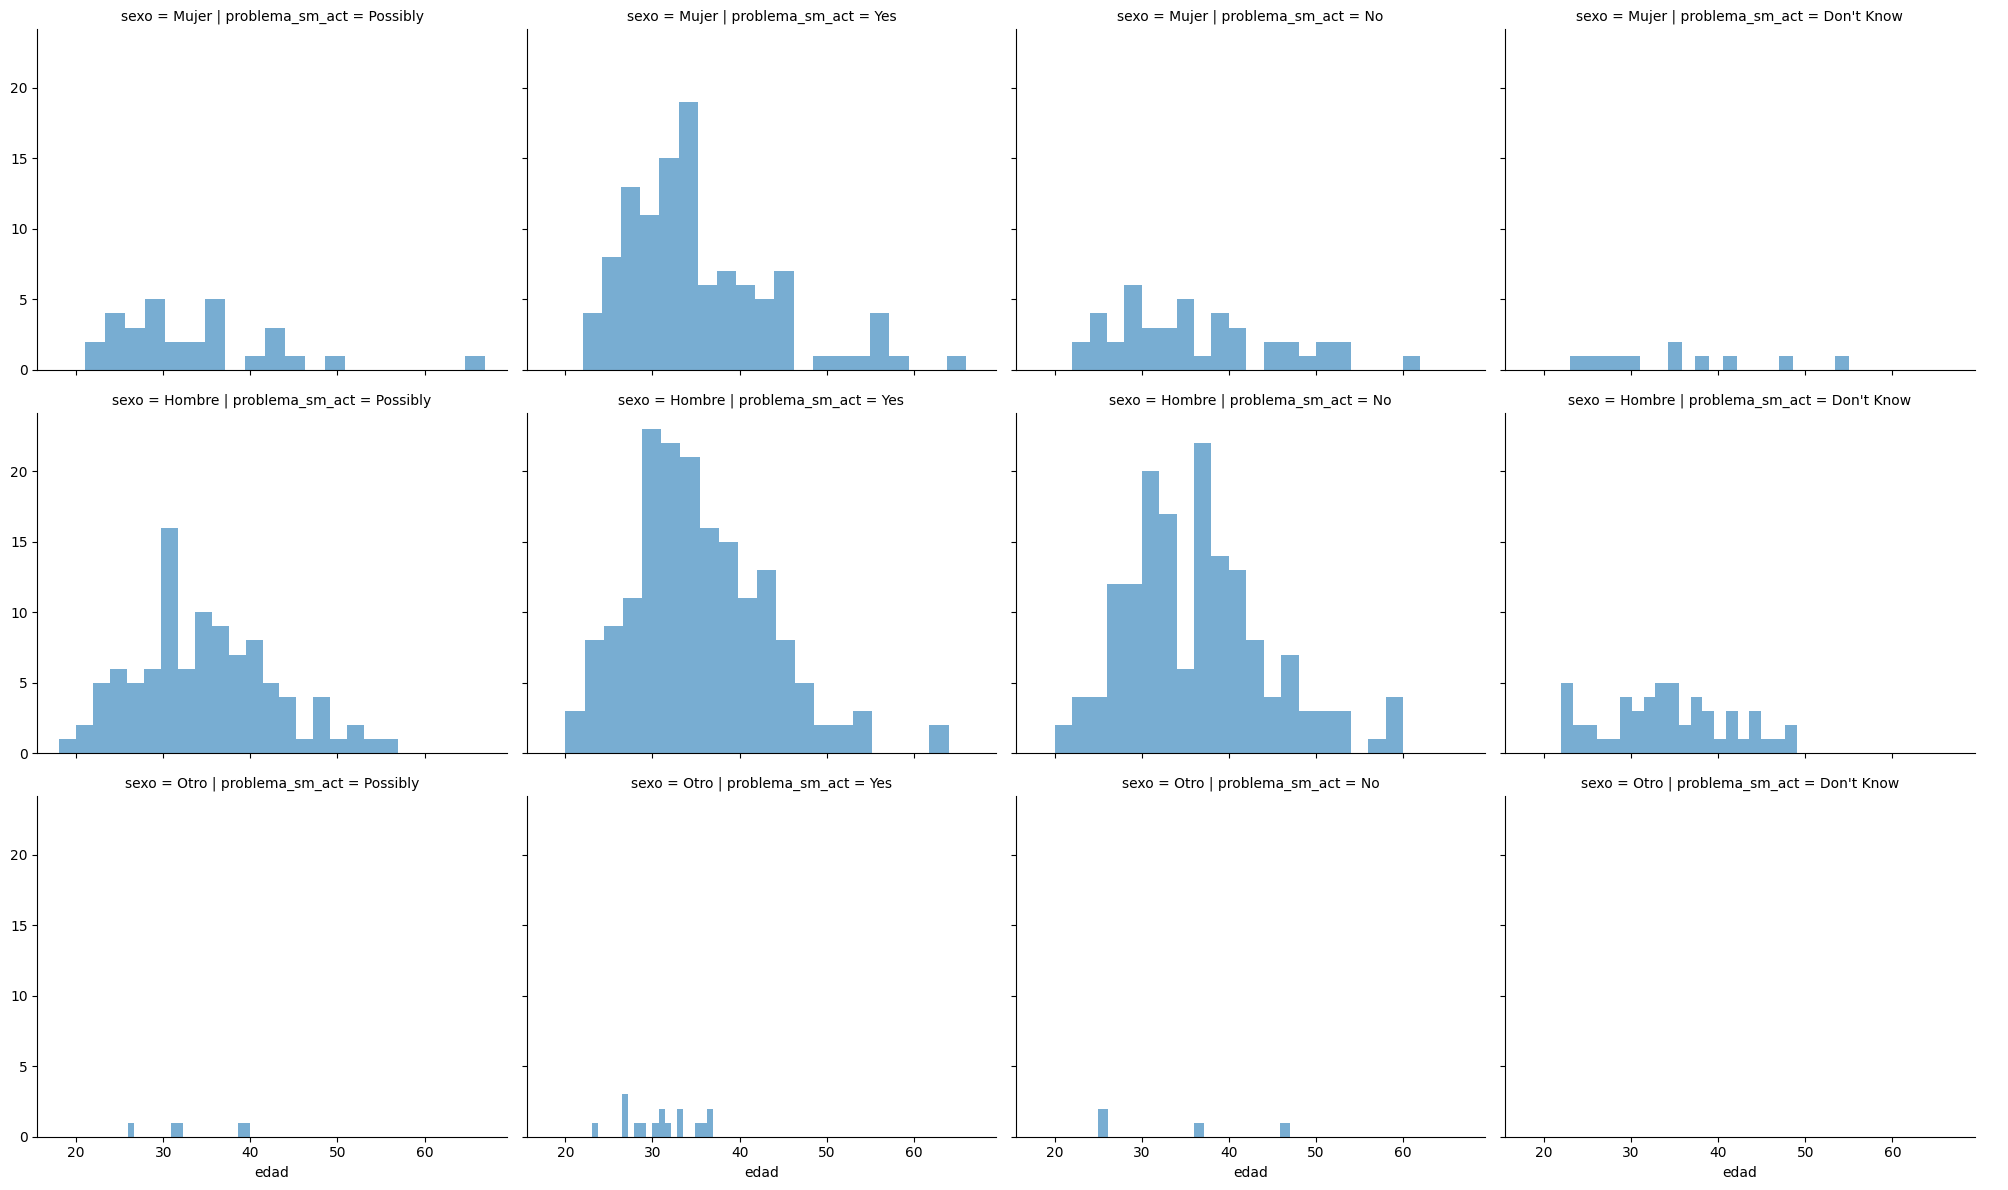

In [16]:
g = sns.FacetGrid(df1, row = 'sexo', col = 'problema_sm_act', height = 4,aspect=1.25)
g.map(plt.hist, 'edad', bins = 20, alpha = 0.6)
g.add_legend()
plt.show()

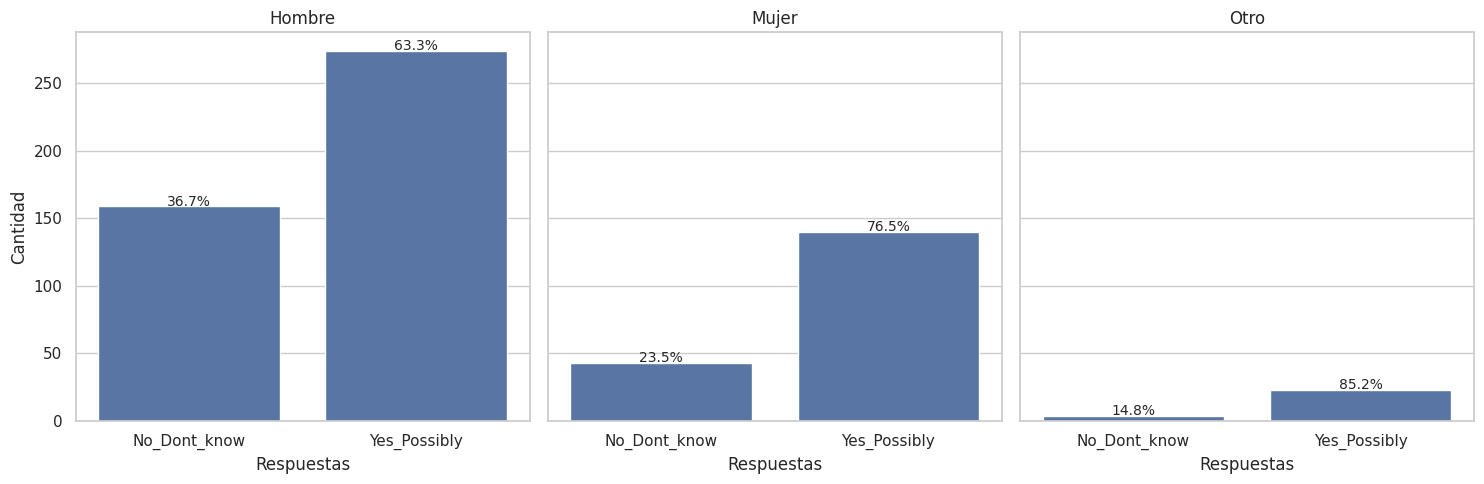

In [17]:
df_filtered = df1[df1['problema_sm_act'].isin(['Yes', 'Possibly', 'No', "Don't know"])].copy()  # Usamos .copy() para evitar el SettingWithCopyWarning

# Crear una nueva columna para clasificar las respuestas en dos categorías: 'Yes_Possibly' y 'No_Dont_know'
df_filtered.loc[:, 'respuesta_categorizada'] = df_filtered['problema_sm_act'].apply(lambda x: 'Yes_Possibly' if x in ['Yes', 'Possibly'] else 'No_Dont_know')

# Sumar los datos por sexo y categoría de respuesta
summary = df_filtered.groupby(['sexo', 'respuesta_categorizada']).size().unstack(fill_value=0)

# Calcular el total de respuestas en cada gráfico
total_respuestas = summary.sum(axis=1)

# Calcular el porcentaje de cada categoría con respecto al total de respuestas
porcentaje = (summary.T / total_respuestas).T * 100

# Graficar los datos
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (sexo, data) in enumerate(summary.iterrows()):
    sns.barplot(x=data.index, y=data.values, ax=axes[i])

    # Mostrar porcentaje encima de cada barra
    for j, valor in enumerate(data):
        axes[i].text(j, valor + 0.5, f'{porcentaje.iloc[i, j]:.1f}%', ha='center', fontsize=10)

    axes[i].set_title(sexo)
    axes[i].set_ylabel('Cantidad')
    axes[i].set_xlabel('Respuestas')

plt.tight_layout()
plt.show()

##Salud mental en el ambito laboral (empresas tecnológicas)

###Selección de datos

In [18]:
df1['autonomo'].value_counts()

autonomo
0    595
1    113
Name: count, dtype: int64

In [19]:
#Eliminar los autónomos para medir lel tratamiento de la salud mental en las empresas
df1.drop(df1[df1['autonomo'] == 1.0].index, inplace = True)

In [20]:
df1['autonomo'].value_counts()

autonomo
0    595
Name: count, dtype: int64

In [21]:
print(df1.shape)

(595, 22)


In [22]:
df1['empresa_tec'].value_counts()

empresa_tec
1.0    460
0.0    135
Name: count, dtype: int64

In [23]:
#Eliminar los individuos que no formen parte de empresas tecnológicas dada su escasez
df1.drop(df1[df1['empresa_tec'] == 0.0].index, inplace = True)

In [24]:
print(df1.shape)

(460, 22)


###Porcentaje de cobertura

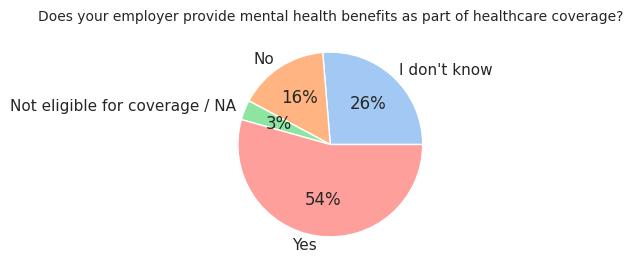

In [25]:
pie2= df1.groupby(['beneficio']).size().plot(kind='pie', autopct='%1.0f%%', title='Does your employer provide mental health benefits as part of healthcare coverage?', colors = colors, figsize=(3,3))
pie2.title.set_fontsize(10)


###¿Conocen los trabajadores las opciones en materia de salud mental recogidas en su cobertura sanitaria?

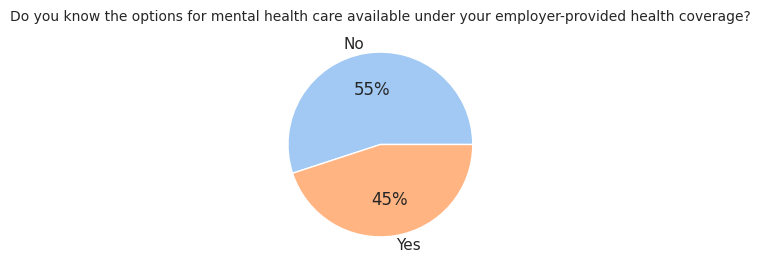

In [26]:
pie2= df1.groupby(['info_opciones_sm']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you know the options for mental health care available under your employer-provided health coverage?', colors = colors, figsize=(3,3))
pie2.title.set_fontsize(10)

###¿Es frecuente que se mencione la salud mental por parte de las empresas?

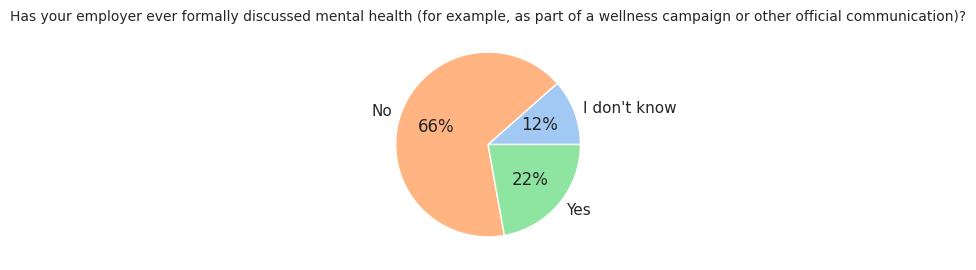

In [27]:
pie2= df1.groupby(['mencion_sm_empleador']).size().plot(kind='pie', autopct='%1.0f%%', title='Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', colors = colors, figsize=(3,3))
pie2.title.set_fontsize(10)

###¿Hablan los trabajadores de su salud mental con sus managers?

In [28]:
df1['conv_sm_empleador'].value_counts()

conv_sm_empleador
0.0    303
1.0    157
Name: count, dtype: int64

In [29]:
df1['conv_sm_empleador'] = df1['conv_sm_empleador'].replace({0.0: 'No', 1.0: 'Yes'})

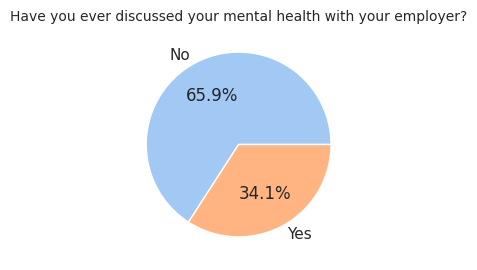

In [30]:
pie2= df1.groupby(['conv_sm_empleador']).size().plot(kind='pie', autopct='%1.1f%%', title='Have you ever discussed your mental health with your employer?', colors = colors, figsize=(3,3))
pie2.title.set_fontsize(10)

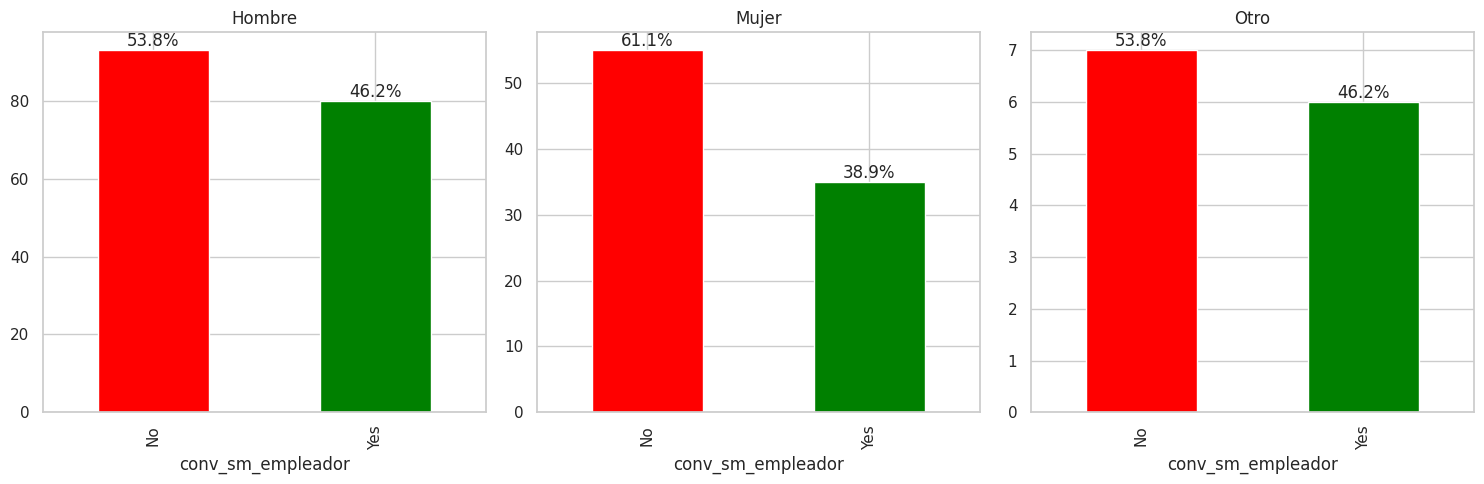

In [31]:
df_filtrado2 = df1[df1['problema_sm_act'].isin(['Yes', 'Possibly'])]

# Agrupar los datos por la variable 'sexo' y sumar los valores 'Yes' y 'No' en la variable 'conv_sm_empleador' para cada grupo
grupo_sexo = df_filtrado2.groupby('sexo')['conv_sm_empleador'].value_counts().unstack().fillna(0)

# Calcular el total de cada grupo de 'sexo'
totals = grupo_sexo.sum(axis=1)

# Graficar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Función para etiquetar las barras con el porcentaje
def etiquetar_barras(ax):
    for patch in ax.patches:
        height = patch.get_height()
        ax.annotate(f'{height / totals[ax.title.get_text()]:.1%}', (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom')

# Gráfico para Hombre
axs[0] = grupo_sexo.loc['Hombre'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0])
axs[0].set_title('Hombre')
etiquetar_barras(axs[0])

# Gráfico para Mujer
axs[1] = grupo_sexo.loc['Mujer'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[1])
axs[1].set_title('Mujer')
etiquetar_barras(axs[1])

# Gráfico para Otro
axs[2] = grupo_sexo.loc['Otro'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[2])
axs[2].set_title('Otro')
etiquetar_barras(axs[2])

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [32]:
df1['conv_sm_antiguo_emp'].value_counts()

conv_sm_antiguo_emp
0.0    311
1.0     88
Name: count, dtype: int64

In [33]:
df1['conv_sm_antiguo_emp'] = df1['conv_sm_antiguo_emp'].replace({0.0: 'No', 1.0: 'Yes'})

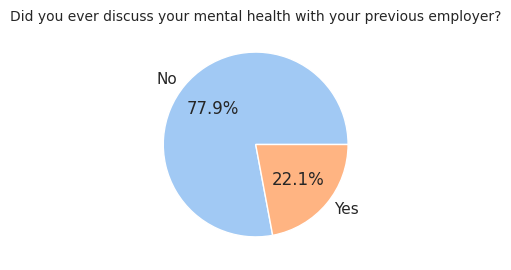

In [34]:
df_filtrado2 = df1[df1['problema_sm_act']=='Yes']
pie2= df1.groupby(['conv_sm_antiguo_emp']).size().plot(kind='pie', autopct='%1.1f%%', title='Did you ever discuss your mental health with your previous employer?', colors = colors, figsize=(3,3))
pie2.title.set_fontsize(10)

In [35]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df1['conv_sm_empleador'], df1['conv_sm_antiguo_emp'])

# Mostrar la tabla de contingencia
print(contingency_table)


conv_sm_antiguo_emp   No  Yes
conv_sm_empleador            
No                   219   43
Yes                   92   45


##Salud mental en el ambito personal

In [36]:
df1['entorno_familiar'].value_counts()

entorno_familiar
7     82
8     66
10    61
5     60
6     49
9     46
3     25
4     23
2     19
0     16
1     13
Name: count, dtype: int64

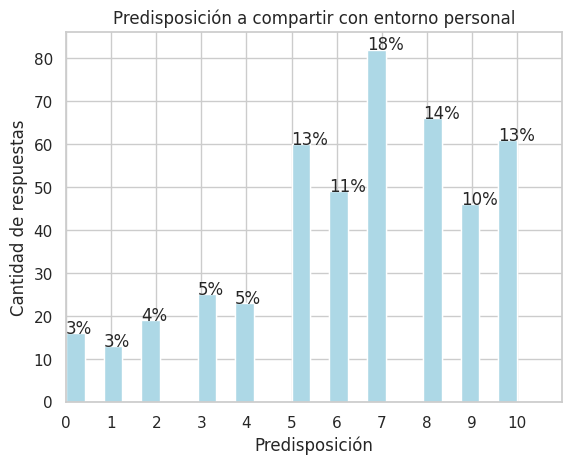

In [37]:
# Calcular los porcentajes
total_respuestas = len(df1['entorno_familiar'])
frecuencias, bins, _ = plt.hist(df1['entorno_familiar'], bins=24, color="lightblue")
porcentajes = [(count / total_respuestas) * 100 for count in frecuencias]

# Graficar el histograma
plt.hist(df1['entorno_familiar'], bins=bins, color="lightblue")
plt.title('Predisposición a compartir con entorno personal')
plt.xlabel('Predisposición')
plt.ylabel('Cantidad de respuestas')

# Establecer los límites y las graduaciones del eje x
plt.xlim(0, 11)
plt.xticks(np.arange(0, 11, step=1))

# Añadir los porcentajes en el gráfico
for i, valor in enumerate(porcentajes):
    if valor > 0:
        plt.annotate(f'{valor:.0f}%', (bins[i], frecuencias[i]))

# Mostrar el gráfico
plt.show()

#Datos 2018

In [38]:
df18= pd.read_csv("/2018.csv")

In [39]:
#Comprobación del número de filas y columnas que tiene el archivo
print("Tamaño del archivo:",df18.shape)
#Comprobacion del numero de valores NA
print(df18.isna().sum().head(5))
#Existen variables con muchos valores nulos o NA, se eliminan aquellas cuyos valores NA sean mayores al 85%
valor_max_na = (0.9 * len(df18))
df18 = df18.loc[:,(df18.isnull().sum(axis = 0) <= valor_max_na)] #se indica axis = 0 para tener en cuenta el número de valores nulos por columna, es decir, por variable.
print("Tamaño después de eliminar columnas de valores nulos:",df18.shape)
print(df18.keys())
print("---------------------------")

Tamaño del archivo: (417, 123)
#                                                                0
<strong>Are you self-employed?</strong>                          0
How many employees does your company or organization have?      56
Is your employer primarily a tech company/organization?         56
Is your primary role within your company related to tech/IT?    56
dtype: int64
Tamaño después de eliminar columnas de valores nulos: (417, 84)
Index(['#', '<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a 

In [40]:
nombres_col18 = {
    '<strong>Are you self-employed?</strong>':'autonomo',
    'How many employees does your company or organization have?':'num_emp',
    'Is your employer primarily a tech company/organization?':'empresa_tec',
    'Is your primary role within your company related to tech/IT?':'puesto_tec',
    'Does your employer provide mental health benefits as part of healthcare coverage?':'beneficio',
    'Do you know the options for mental health care available under your employer-provided health coverage?':'info_opciones_sm',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'mencion_sm_empleador',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?':'oferta_recursos_sm',
    'Have you ever discussed your mental health with your employer?':'conv_sm_empleador',
    'Have you ever discussed your mental health with coworkers?':'conv_sm_comp',
    'Overall, how much importance does your employer place on physical health?':'imp_saludfisica',
    'Overall, how much importance does your employer place on mental health?':'imp_saludmental',
    'Did you ever discuss your mental health with your previous employer?':'conv_sm_antiguo_emp',
    'Did you ever discuss your mental health with a previous coworker(s)?':'conv_sm_antiguo_comp',
    'Do you currently have a mental health disorder?':'problema_sm_act',
    'Have you had a mental health disorder in the past?':'problema_sm_pasado',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?':'tratamiento_sm',
    'Do you have a family history of mental illness?':'historial_familiar',
    'How willing would you be to share with friends and family that you have a mental illness?':'entorno_familiar',
    'What is your age?':'edad',
    'What is your gender?':'sexo',
    'What country do you <strong>live</strong> in?':'pais'}


In [41]:
#selección de las columnas deseadas para hacer el análisis
col_selec = nombres_col18.keys()
df2 = df18[col_selec].copy()
#col_quitar = [item for item in df17.columns if item not in col_selec]
#df17.drop(columns = col_quitar, inplace = True, errors = 'ignore')
print('Tamaño sin columnas no deseadas: ', df2.shape)
print(df2.keys())

Tamaño sin columnas no deseadas:  (417, 22)
Index(['<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Have you ever discussed your mental health with your employer?',
       'Have you ever discussed your mental health with coworkers?',
       'Overall, how much importance does your employer place on physical health?',
     

In [42]:
#Renombramiento de las columnas para facilitar su tratamiento y análisis
df2.rename(columns = nombres_col18, inplace = True, errors = 'ignore')
print(df2.keys())

Index(['autonomo', 'num_emp', 'empresa_tec', 'puesto_tec', 'beneficio',
       'info_opciones_sm', 'mencion_sm_empleador', 'oferta_recursos_sm',
       'conv_sm_empleador', 'conv_sm_comp', 'imp_saludfisica',
       'imp_saludmental', 'conv_sm_antiguo_emp', 'conv_sm_antiguo_comp',
       'problema_sm_act', 'problema_sm_pasado', 'tratamiento_sm',
       'historial_familiar', 'entorno_familiar', 'edad', 'sexo', 'pais'],
      dtype='object')


## Tratamiento de las variables

###Variable puesto_tec

In [43]:
df2['puesto_tec'].value_counts()

puesto_tec
1.0    346
0.0     15
Name: count, dtype: int64

In [44]:
#Eliminar aquellos individuos que no tengan un puesto tecnológico
df2.drop(df2[df2['puesto_tec'] == 0.0].index, inplace = True)

### Variable sexo

In [45]:
df2['sexo'].value_counts()

sexo
Male                             162
Female                            64
male                              57
female                            20
M                                 17
m                                 11
F                                  6
f                                  6
Female                             5
Male                               4
Woman                              3
cis male                           3
woman                              2
Genderqueer                        2
Man                                2
cisgender female                   1
Trans woman                        1
genderfluid                        1
Demiguy                            1
Nonbinary/femme                    1
none                               1
non-binary                         1
Trans female                       1
Cisgender male                     1
She/her/they/them                  1
Other                              1
Cis female                       

In [46]:
df2['sexo'] = df2['sexo'].str.lower().str.strip()

In [47]:
#Redistribución de la variable sexo para englobar dentro de hombre, mujer y otros
sexo_masculino = ['male', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male','male/androgynous','male (hey this is the tech industry you\'re talking about)','male, cis','homem cis','malel']
sexo_femenino = ['female', 'f', 'woman', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female','female-ish','woman-identified']
sexo_otro = ['agender', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer','male (or female, or both)']

df2['sexo'] = df2['sexo'].replace(sexo_masculino, 'Hombre')
df2['sexo'] = df2['sexo'].replace(sexo_femenino, 'Mujer')
df2['sexo'] = df2['sexo'].replace(sexo_otro, 'Otro')

df2['sexo'] = df2['sexo'].fillna('Otro')

df2['sexo'].value_counts()

sexo
Hombre    264
Mujer     117
Otro       21
Name: count, dtype: int64

###Variable edad

In [48]:
df2['edad'].describe()

count    402.000000
mean      34.965174
std        7.988070
min       19.000000
25%       29.000000
50%       34.000000
75%       39.000000
max       67.000000
Name: edad, dtype: float64

##Análisis general de los trabajadores en puestos tecnológicos, estudiando su distribución por sexo y edad.

In [49]:
df2['problema_sm_act'].describe()

count     402
unique      4
top       Yes
freq      181
Name: problema_sm_act, dtype: object

In [50]:
colors = sns.color_palette('pastel')[0:6]

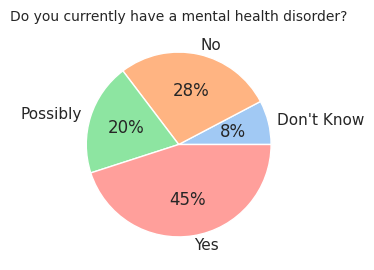

In [51]:
pie1= df2.groupby(['problema_sm_act']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you currently have a mental health disorder?', colors = colors, figsize=(3,3))
pie1.title.set_fontsize(10)


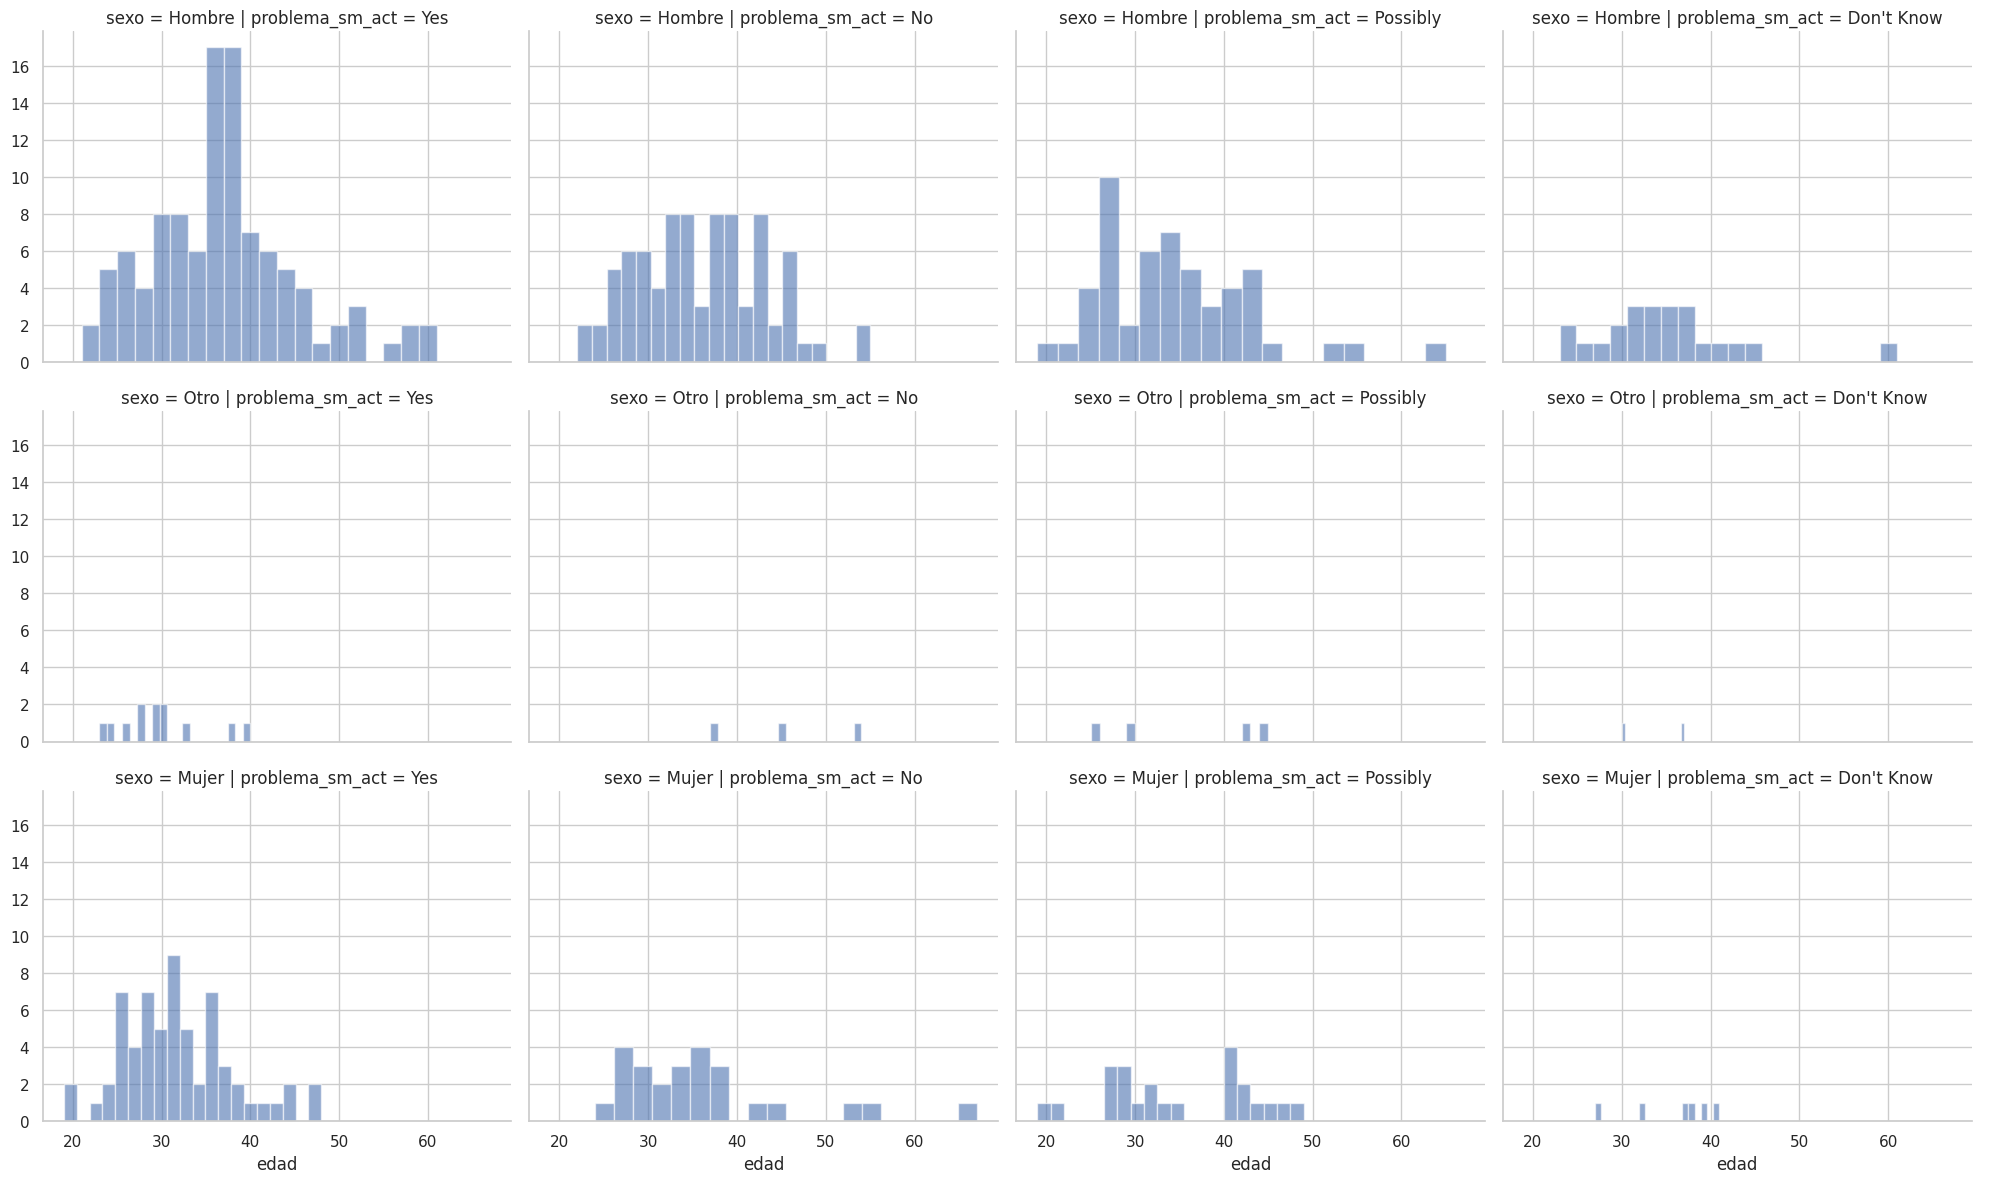

In [52]:
g2 = sns.FacetGrid(df2, row = 'sexo', col = 'problema_sm_act', height = 4,aspect=1.25)
g2.map(plt.hist, 'edad', bins = 20, alpha = 0.6)
g2.add_legend()
plt.show()

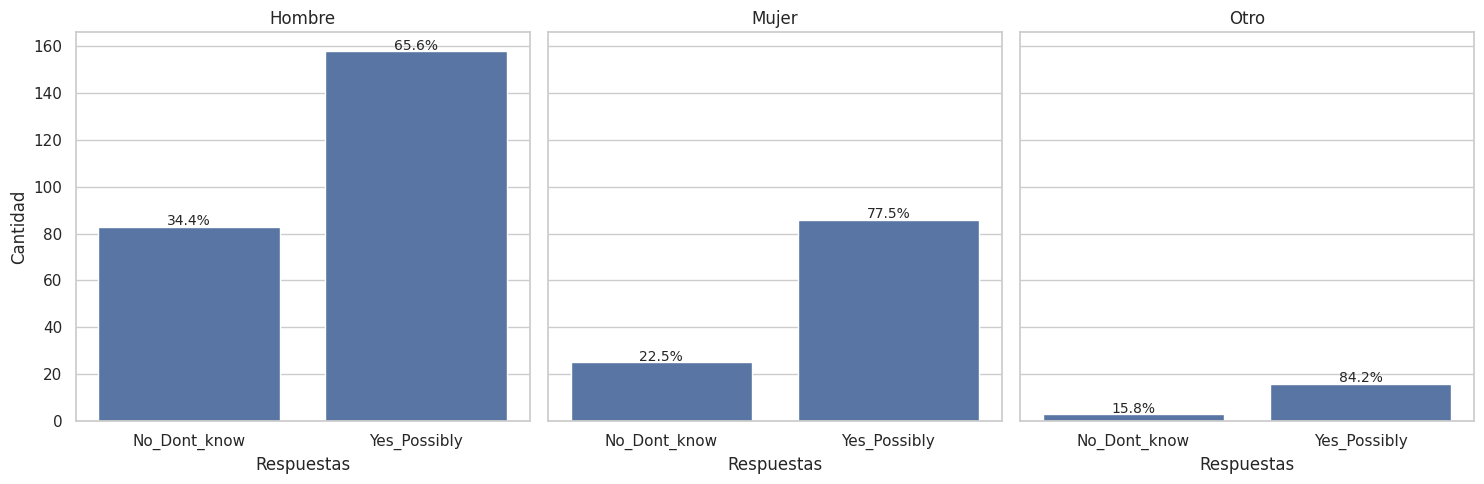

In [53]:
df_filtered2 = df2[df2['problema_sm_act'].isin(['Yes', 'Possibly', 'No', "Don't know"])].copy()  # Usamos .copy() para evitar el SettingWithCopyWarning

# Crear una nueva columna para clasificar las respuestas en dos categorías: 'Yes_Possibly' y 'No_Dont_know'
df_filtered2.loc[:, 'respuesta_categorizada'] = df_filtered2['problema_sm_act'].apply(lambda x: 'Yes_Possibly' if x in ['Yes', 'Possibly'] else 'No_Dont_know')

# Sumarizar los datos por sexo y categoría de respuesta
summary = df_filtered2.groupby(['sexo', 'respuesta_categorizada']).size().unstack(fill_value=0)

# Calcular el total de respuestas en cada gráfico
total_respuestas = summary.sum(axis=1)

# Calcular el porcentaje de cada categoría con respecto al total de respuestas
porcentaje = (summary.T / total_respuestas).T * 100

# Graficar los datos
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (sexo, data) in enumerate(summary.iterrows()):
    sns.barplot(x=data.index, y=data.values, ax=axes[i])

    # Mostrar porcentaje encima de cada barra
    for j, valor in enumerate(data):
        axes[i].text(j, valor + 0.5, f'{porcentaje.iloc[i, j]:.1f}%', ha='center', fontsize=10)

    axes[i].set_title(sexo)
    axes[i].set_ylabel('Cantidad')
    axes[i].set_xlabel('Respuestas')

plt.tight_layout()
plt.show()

##Salud mental en el ambito laboral (empresas tecnológicas)

###Selección de datos

In [54]:
df2['autonomo'].value_counts()

autonomo
0    346
1     56
Name: count, dtype: int64

In [55]:
#Eliminar los autónomos para medir lel tratamiento de la salud mental en las empresas
df2.drop(df2[df2['autonomo'] == 1.0].index, inplace = True)

In [56]:
df2['autonomo'].value_counts()

autonomo
0    346
Name: count, dtype: int64

In [57]:
print(df2.shape)

(346, 22)


In [58]:
df2['empresa_tec'].value_counts()

empresa_tec
1.0    255
0.0     91
Name: count, dtype: int64

In [59]:
#Eliminar los individuos que no trabajan en empresas tecnológicas dada su escasez
df2.drop(df2[df2['empresa_tec'] == 0.0].index, inplace = True)

In [60]:
print(df2.shape)

(255, 22)


###Porcentaje de cobertura

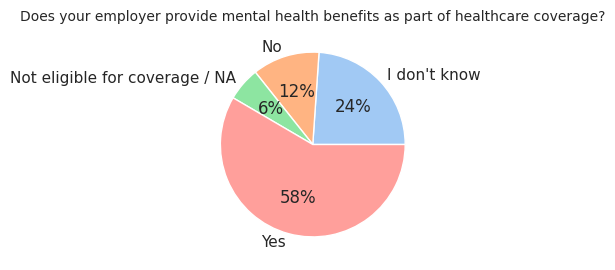

In [61]:
pie22= df2.groupby(['beneficio']).size().plot(kind='pie', autopct='%1.0f%%', title='Does your employer provide mental health benefits as part of healthcare coverage?', colors = colors, figsize=(3,3))
pie22.title.set_fontsize(10)


###¿Conocen los trabajadores las opciones en materia de salud mental recogidas en su cobertura sanitaria?

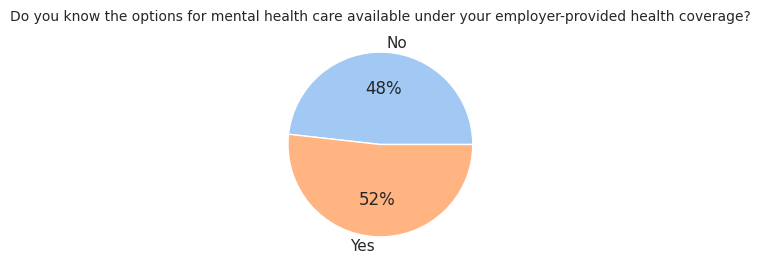

In [62]:
pie32= df2.groupby(['info_opciones_sm']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you know the options for mental health care available under your employer-provided health coverage?', colors = colors, figsize=(3,3))
pie32.title.set_fontsize(10)

###¿Es frecuente que se mencione la salud mental por parte de las empresas?

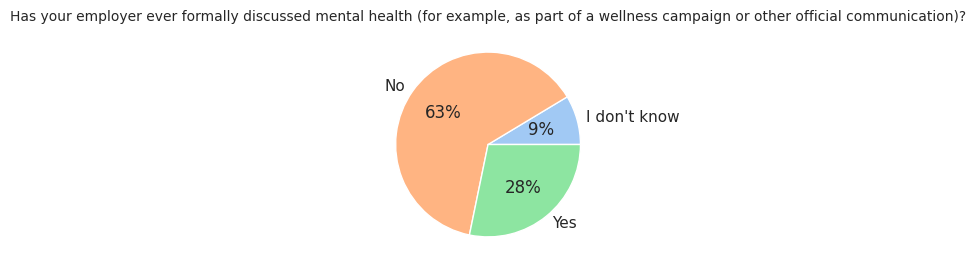

In [63]:
pie42= df2.groupby(['mencion_sm_empleador']).size().plot(kind='pie', autopct='%1.0f%%', title='Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', colors = colors, figsize=(3,3))
pie42.title.set_fontsize(10)

###¿Hablan los trabajadores de su salud mental con sus managers?

In [64]:
df2['conv_sm_empleador'].value_counts()

conv_sm_empleador
0.0    161
1.0     94
Name: count, dtype: int64

In [65]:
df2['conv_sm_empleador'] = df2['conv_sm_empleador'].replace({0.0: 'No', 1.0: 'Yes'})

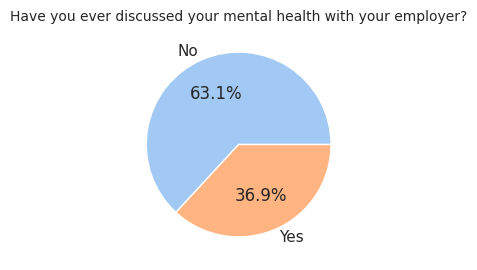

In [66]:
pie52= df2.groupby(['conv_sm_empleador']).size().plot(kind='pie', autopct='%1.1f%%', title='Have you ever discussed your mental health with your employer?', colors = colors, figsize=(3,3))
pie52.title.set_fontsize(10)

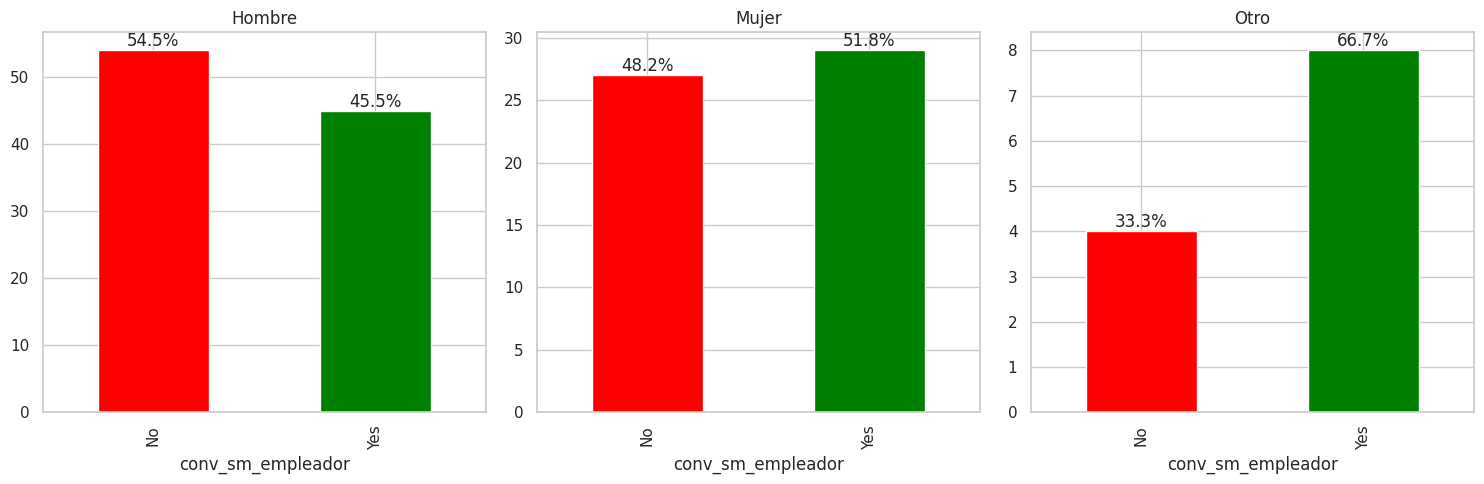

In [67]:
df_filtrado22 = df2[df2['problema_sm_act'].isin(['Yes', 'Possibly'])]

# Agrupar los datos por la variable 'sexo' y sumar los valores 'Yes' y 'No' en la variable 'conv_sm_empleador' para cada grupo
grupo_sexo = df_filtrado22.groupby('sexo')['conv_sm_empleador'].value_counts().unstack().fillna(0)

# Calcular el total de cada grupo de 'sexo'
totals = grupo_sexo.sum(axis=1)

# Graficar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Función para etiquetar las barras con el porcentaje
def etiquetar_barras(ax):
    for patch in ax.patches:
        height = patch.get_height()
        ax.annotate(f'{height / totals[ax.title.get_text()]:.1%}', (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom')

# Gráfico para Hombre
axs[0] = grupo_sexo.loc['Hombre'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0])
axs[0].set_title('Hombre')
etiquetar_barras(axs[0])

# Gráfico para Mujer
axs[1] = grupo_sexo.loc['Mujer'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[1])
axs[1].set_title('Mujer')
etiquetar_barras(axs[1])

# Gráfico para Otro
axs[2] = grupo_sexo.loc['Otro'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[2])
axs[2].set_title('Otro')
etiquetar_barras(axs[2])

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [68]:
df2['conv_sm_antiguo_emp'].value_counts()

conv_sm_antiguo_emp
0.0    165
1.0     55
Name: count, dtype: int64

In [69]:
df2['conv_sm_antiguo_emp'] = df2['conv_sm_antiguo_emp'].replace({0.0: 'No', 1.0: 'Yes'})

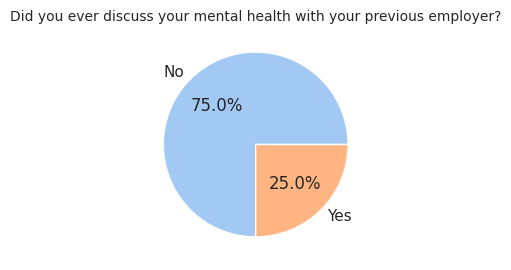

In [70]:
df_filtrado32 = df2[df2['problema_sm_act']=='Yes']
pie62= df2.groupby(['conv_sm_antiguo_emp']).size().plot(kind='pie', autopct='%1.1f%%', title='Did you ever discuss your mental health with your previous employer?', colors = colors, figsize=(3,3))
pie62.title.set_fontsize(10)

In [71]:
# Crear una tabla de contingencia
contingency_table2 = pd.crosstab(df2['conv_sm_empleador'], df2['conv_sm_antiguo_emp'])

# Mostrar la tabla de contingencia
print(contingency_table2)


conv_sm_antiguo_emp   No  Yes
conv_sm_empleador            
No                   113   23
Yes                   52   32


##Salud mental en el ambito personal

In [72]:
df2['entorno_familiar'].value_counts()

entorno_familiar
10    51
8     50
7     36
9     29
5     28
6     25
2     12
4     11
3      7
0      5
1      1
Name: count, dtype: int64

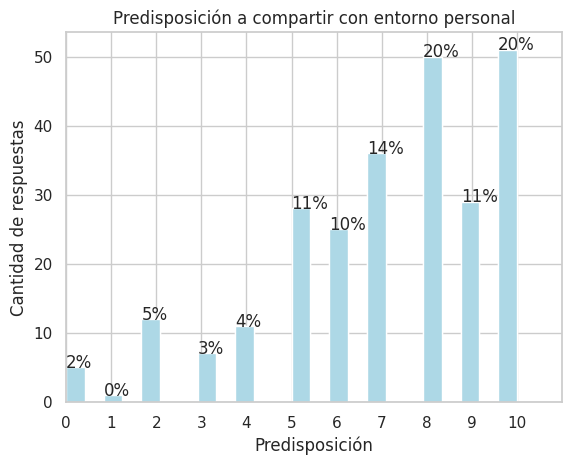

In [73]:
# Calcular los porcentajes
total_respuestas2 = len(df2['entorno_familiar'])
frecuencias, bins, _ = plt.hist(df2['entorno_familiar'], bins=24, color="lightblue")
porcentajes = [(count / total_respuestas2) * 100 for count in frecuencias]

# Graficar el histograma
plt.hist(df2['entorno_familiar'], bins=bins, color="lightblue")
plt.title('Predisposición a compartir con entorno personal')
plt.xlabel('Predisposición')
plt.ylabel('Cantidad de respuestas')

# Establecer los límites y las graduaciones del eje x
plt.xlim(0, 11)
plt.xticks(np.arange(0, 11, step=1))

# Añadir los porcentajes en el gráfico
for i, valor in enumerate(porcentajes):
    if valor > 0:
        plt.annotate(f'{valor:.0f}%', (bins[i], frecuencias[i]))

# Mostrar el gráfico
plt.show()

#Datos 2019

In [74]:
df19= pd.read_csv("/2019.csv")

In [75]:
#Comprobación del número de filas y columnas que tiene el archivo
print("Tamaño del archivo:",df19.shape)
#Comprobacion del numero de valores NA
print(df19.isna().sum().head(5))
#Existen variables con muchos valores nulos o NA, se eliminan aquellas cuyos valores NA sean mayores al 85%
valor_max_na = (0.9 * len(df19))
df19 = df19.loc[:,(df19.isnull().sum(axis = 0) <= valor_max_na)] #se indica axis = 0 para tener en cuenta el número de valores nulos por columna, es decir, por variable.
print("Tamaño después de eliminar columnas de valores nulos:",df19.shape)
print(df19.keys())
print("---------------------------")

Tamaño del archivo: (352, 82)
*Are you self-employed?*                                                              0
How many employees does your company or organization have?                           48
Is your employer primarily a tech company/organization?                              48
Is your primary role within your company related to tech/IT?                         48
Does your employer provide mental health benefits as part of healthcare coverage?    48
dtype: int64
Tamaño después de eliminar columnas de valores nulos: (352, 78)
Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       

In [76]:
nombres_col19 = {
    '*Are you self-employed?*':'autonomo',
    'How many employees does your company or organization have?':'num_emp',
    'Is your employer primarily a tech company/organization?':'empresa_tec',
    'Is your primary role within your company related to tech/IT?':'puesto_tec',
    'Does your employer provide mental health benefits as part of healthcare coverage?':'beneficio',
    'Do you know the options for mental health care available under your employer-provided health coverage?':'info_opciones_sm',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'mencion_sm_empleador',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?':'oferta_recursos_sm',
    'Have you ever discussed your mental health with your employer?':'conv_sm_empleador',
    'Have you ever discussed your mental health with coworkers?':'conv_sm_comp',
    'Overall, how much importance does your employer place on physical health?':'imp_saludfisica',
    'Overall, how much importance does your employer place on mental health?':'imp_saludmental',
    'Did you ever discuss your mental health with your previous employer?':'conv_sm_antiguo_emp',
    'Did you ever discuss your mental health with a previous coworker(s)?':'conv_sm_antiguo_comp',
    'Do you *currently* have a mental health disorder?':'problema_sm_act',
    'Have you had a mental health disorder in the past?':'problema_sm_pasado',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?':'tratamiento_sm',
    'Do you have a family history of mental illness?':'historial_familiar',
    'How willing would you be to share with friends and family that you have a mental illness?':'entorno_familiar',
    'What is your age?':'edad',
    'What is your gender?':'sexo',
    'What country do you *live* in?':'pais'}


In [77]:
#selección de las columnas deseadas para hacer el análisis
col_selec = nombres_col19.keys()
df3 = df19[col_selec].copy()
#col_quitar = [item for item in df17.columns if item not in col_selec]
#df17.drop(columns = col_quitar, inplace = True, errors = 'ignore')
print('Tamaño sin columnas no deseadas: ', df3.shape)
print(df3.keys())

Tamaño sin columnas no deseadas:  (352, 22)
Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Have you ever discussed your mental health with your employer?',
       'Have you ever discussed your mental health with coworkers?',
       'Overall, how much importance does your employer place on physical health?',
       'Overall, how

In [78]:
#Renombramiento de las columnas para facilitar su tratamiento y análisis
df3.rename(columns = nombres_col19, inplace = True, errors = 'ignore')
print(df3.keys())

Index(['autonomo', 'num_emp', 'empresa_tec', 'puesto_tec', 'beneficio',
       'info_opciones_sm', 'mencion_sm_empleador', 'oferta_recursos_sm',
       'conv_sm_empleador', 'conv_sm_comp', 'imp_saludfisica',
       'imp_saludmental', 'conv_sm_antiguo_emp', 'conv_sm_antiguo_comp',
       'problema_sm_act', 'problema_sm_pasado', 'tratamiento_sm',
       'historial_familiar', 'entorno_familiar', 'edad', 'sexo', 'pais'],
      dtype='object')


## Tratamiento de las variables

###Variable puesto_tec

In [79]:
df3['puesto_tec'].value_counts()

puesto_tec
True     282
False     22
Name: count, dtype: int64

In [80]:
#Eliminar aquellos individuos que no tengan un puesto tecnológico
df3.drop(df3[df3['puesto_tec'] == 0.0].index, inplace = True)

### Variable sexo

In [81]:
df3['sexo'].value_counts()

sexo
Male                                   138
male                                    51
Female                                  44
female                                  22
M                                       14
F                                        8
m                                        7
Woman                                    4
Female                                   2
agender                                  2
f                                        2
Non-binary                               2
Male                                     1
cis woman                                1
Femile                                   1
CIS Male                                 1
Trans non-binary/genderfluid             1
Make                                     1
I am a Wookie                            1
masculino                                1
man                                      1
Trans man                                1
femmina                                  1
Let's 

In [82]:
df3['sexo'] = df3['sexo'].str.lower().str.strip()

In [83]:
#Redistribución de la variable sexo para englobar dentro de hombre, mujer y otros
sexo_masculino = ['male', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male','male/androgynous','male (hey this is the tech industry you\'re talking about)','male, cis','homem cis','malel','i have a penis']
sexo_femenino = ['female', 'f', 'woman', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female','female-ish','woman-identified','female-identified']
sexo_otro = ['agender', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer','male (or female, or both)','rr','i am a wookie']

df3['sexo'] = df3['sexo'].replace(sexo_masculino, 'Hombre')
df3['sexo'] = df3['sexo'].replace(sexo_femenino, 'Mujer')
df3['sexo'] = df3['sexo'].replace(sexo_otro, 'Otro')

df3['sexo'] = df3['sexo'].fillna('Otro')

df3['sexo'].value_counts()

sexo
Hombre    222
Mujer      88
Otro       20
Name: count, dtype: int64

###Variable edad

In [84]:
df3['edad'].describe()

count    330.000000
mean      35.654545
std        9.192408
min        0.000000
25%       29.000000
50%       35.000000
75%       41.000000
max       64.000000
Name: edad, dtype: float64

In [85]:
# Obtener media
edad_media = df3[(df3["edad"] >= 18) | (df3["edad"] <= 75)]["edad"].mean()

# Reemplazar las irregularidades con la edad media
df3["edad"].replace(to_replace = df3[(df3["edad"] < 18) | (df3["edad"] > 75)]["edad"].tolist(), value = edad_media, inplace = True)

df3['edad'].describe()

count    330.000000
mean      35.762590
std        8.979125
min       19.000000
25%       29.000000
50%       35.000000
75%       41.000000
max       64.000000
Name: edad, dtype: float64

##Análisis general de los trabajadores en puestos tecnológicos, estudiando su distribución por sexo y edad.

In [86]:
df3['problema_sm_act'].describe()

count     330
unique      4
top       Yes
freq      134
Name: problema_sm_act, dtype: object

In [87]:
colors = sns.color_palette('pastel')[0:6]

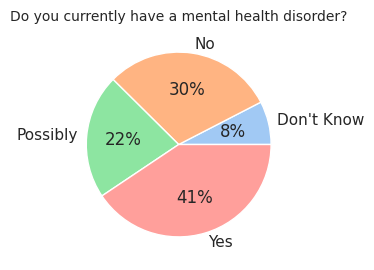

In [88]:
pie13= df3.groupby(['problema_sm_act']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you currently have a mental health disorder?', colors = colors, figsize=(3,3))
pie13.title.set_fontsize(10)


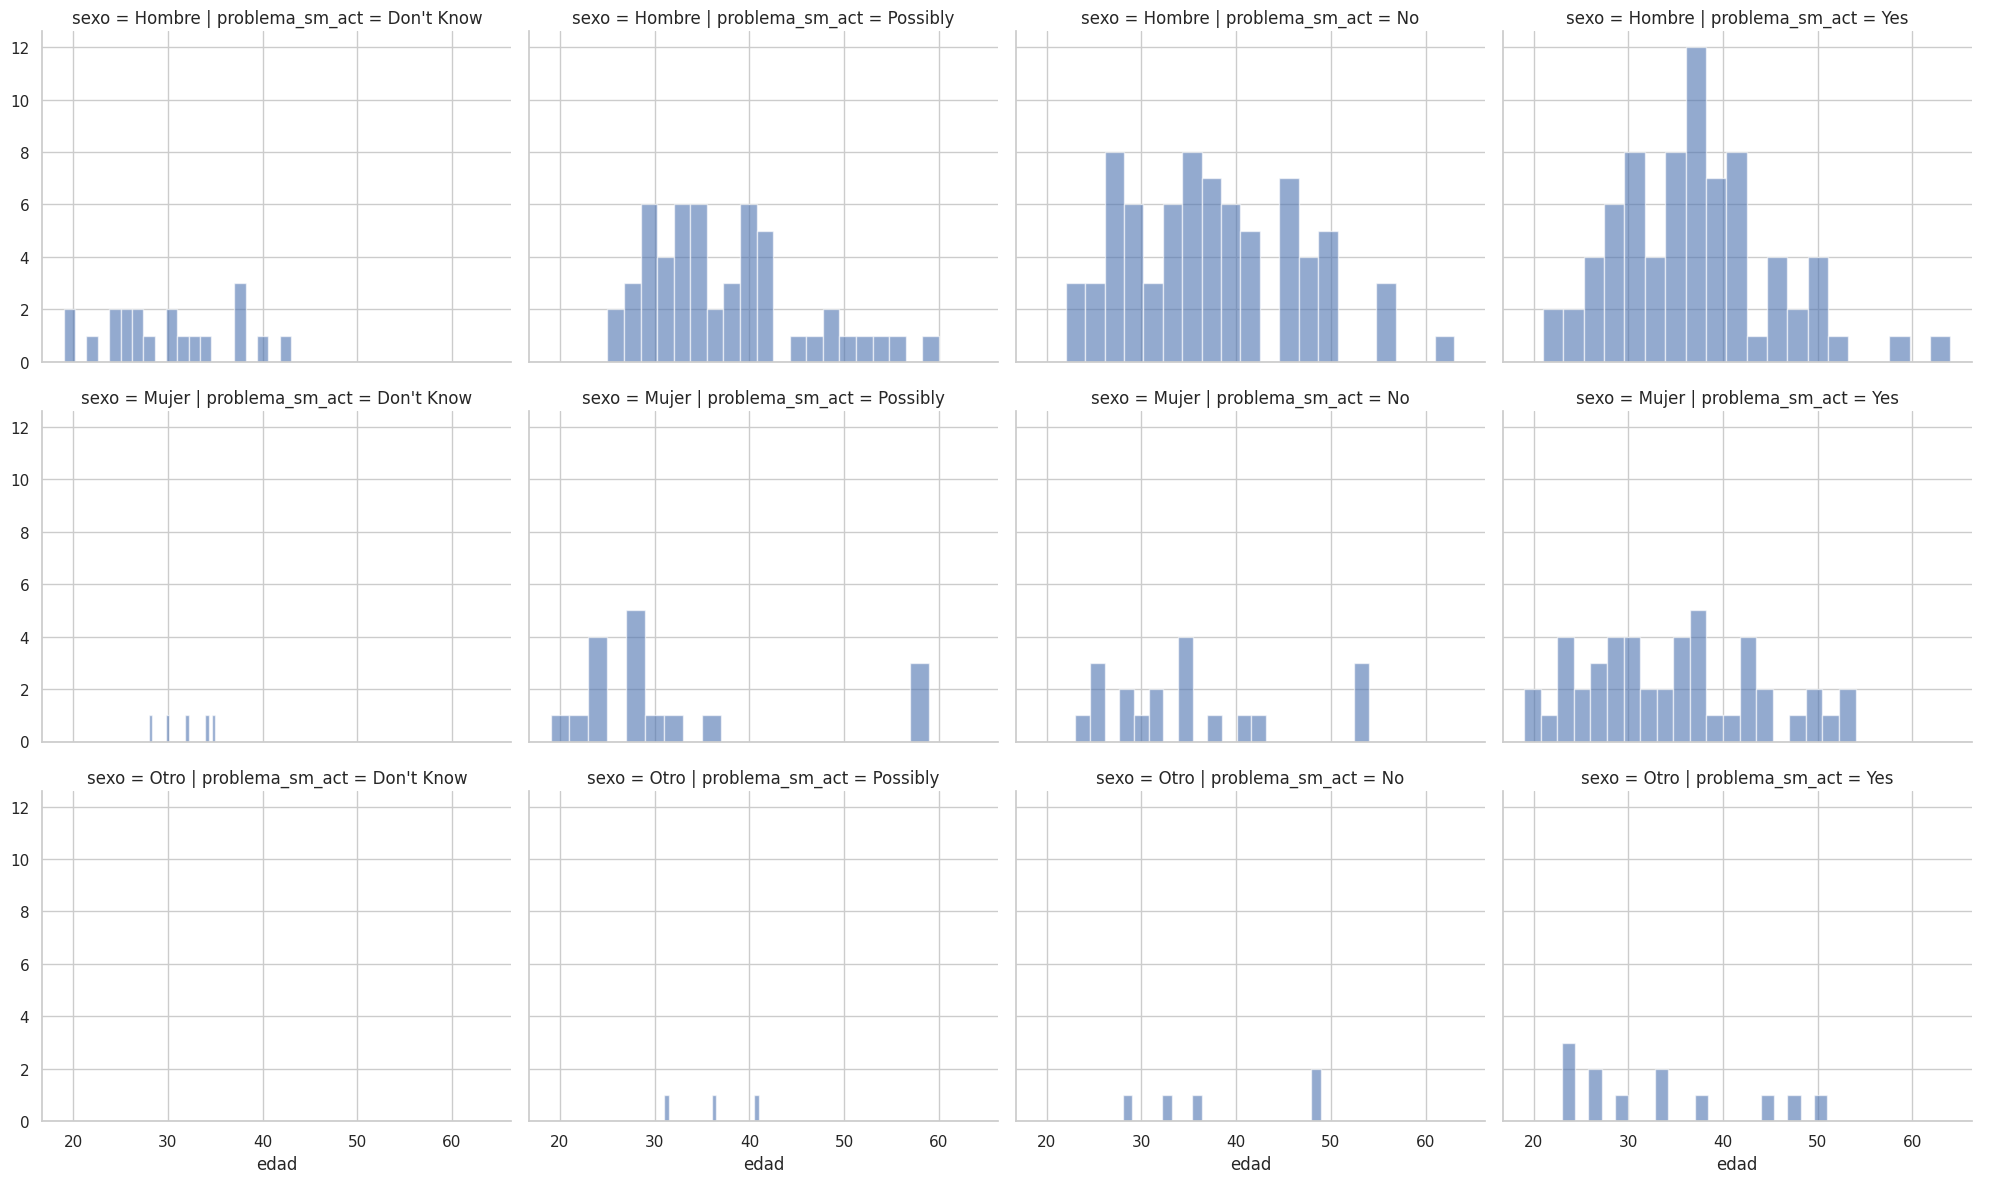

In [89]:
g3 = sns.FacetGrid(df3, row = 'sexo', col = 'problema_sm_act', height = 4,aspect=1.25)
g3.map(plt.hist, 'edad', bins = 20, alpha = 0.6)
g3.add_legend()
plt.show()

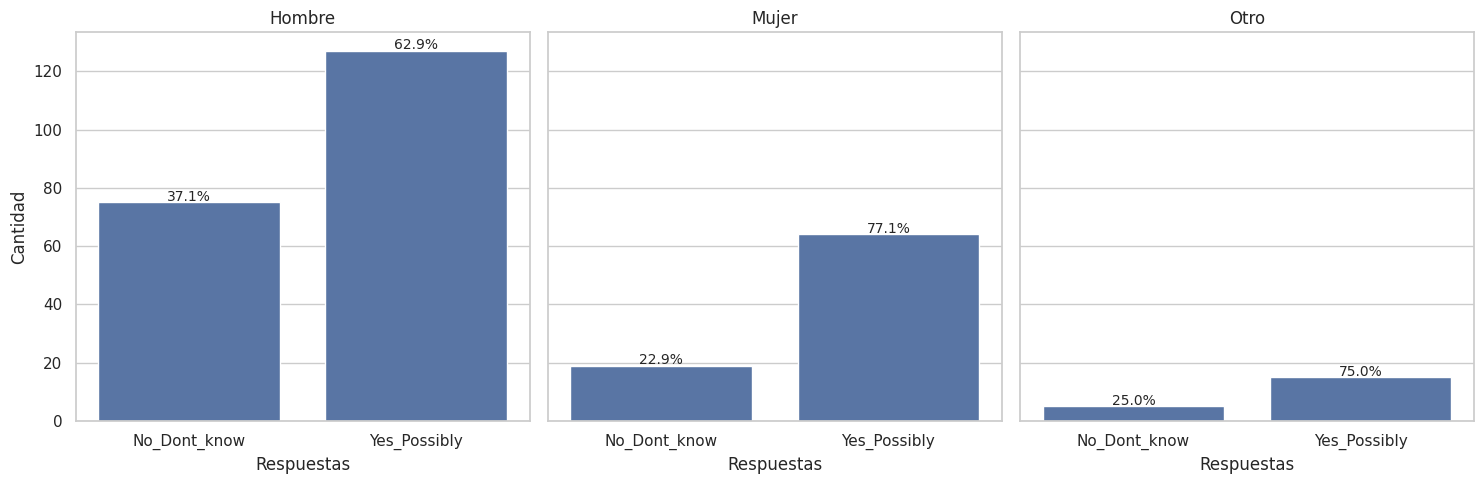

In [90]:
df_filtered3 = df3[df3['problema_sm_act'].isin(['Yes', 'Possibly', 'No', "Don't know"])].copy()  # Usamos .copy() para evitar el SettingWithCopyWarning

# Crear una nueva columna para clasificar las respuestas en dos categorías: 'Yes_Possibly' y 'No_Dont_know'
df_filtered3.loc[:, 'respuesta_categorizada'] = df_filtered3['problema_sm_act'].apply(lambda x: 'Yes_Possibly' if x in ['Yes', 'Possibly'] else 'No_Dont_know')

# Sumarizar los datos por sexo y categoría de respuesta
summary = df_filtered3.groupby(['sexo', 'respuesta_categorizada']).size().unstack(fill_value=0)

# Calcular el total de respuestas en cada gráfico
total_respuestas = summary.sum(axis=1)

# Calcular el porcentaje de cada categoría con respecto al total de respuestas
porcentaje = (summary.T / total_respuestas).T * 100

# Graficar los datos
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (sexo, data) in enumerate(summary.iterrows()):
    sns.barplot(x=data.index, y=data.values, ax=axes[i])

    # Mostrar porcentaje encima de cada barra
    for j, valor in enumerate(data):
        axes[i].text(j, valor + 0.5, f'{porcentaje.iloc[i, j]:.1f}%', ha='center', fontsize=10)

    axes[i].set_title(sexo)
    axes[i].set_ylabel('Cantidad')
    axes[i].set_xlabel('Respuestas')

plt.tight_layout()
plt.show()

##Salud mental en el ambito laboral (empresas tecnológicas)

###Selección de datos

In [91]:
df3['autonomo'].value_counts()

autonomo
False    282
True      48
Name: count, dtype: int64

In [92]:
#Eliminar los autónomos para medir lel tratamiento de la salud mental en las empresas
df3.drop(df3[df3['autonomo'] == 1.0].index, inplace = True)

In [93]:
print(df3.shape)

(282, 22)


In [94]:
df3['empresa_tec'].value_counts()

empresa_tec
True     194
False     88
Name: count, dtype: int64

In [95]:
#Eliminar los individuos que no forman parte de empresas tecnológicas dada su escasez
df3.drop(df3[df3['empresa_tec'] == 0.0].index, inplace = True)

In [96]:
print(df3.shape)

(194, 22)


###Porcentaje de cobertura

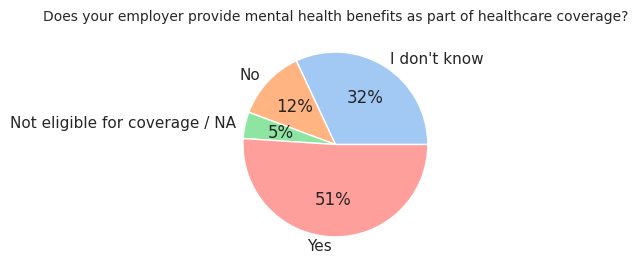

In [97]:
pie23= df3.groupby(['beneficio']).size().plot(kind='pie', autopct='%1.0f%%', title='Does your employer provide mental health benefits as part of healthcare coverage?', colors = colors, figsize=(3,3))
pie23.title.set_fontsize(10)


###¿Conocen los trabajadores las opciones en materia de salud mental recogidas en su cobertura sanitaria?

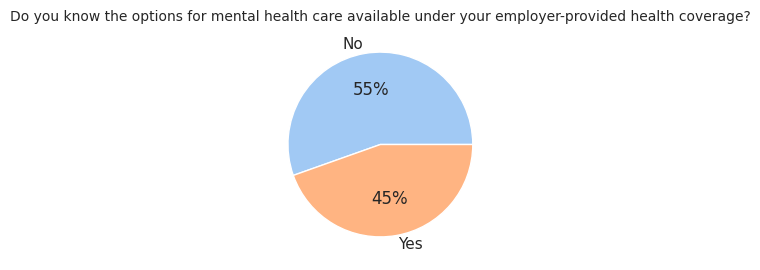

In [98]:
pie33= df3.groupby(['info_opciones_sm']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you know the options for mental health care available under your employer-provided health coverage?', colors = colors, figsize=(3,3))
pie33.title.set_fontsize(10)

###¿Es frecuente que se mencione la salud mental por parte de las empresas?

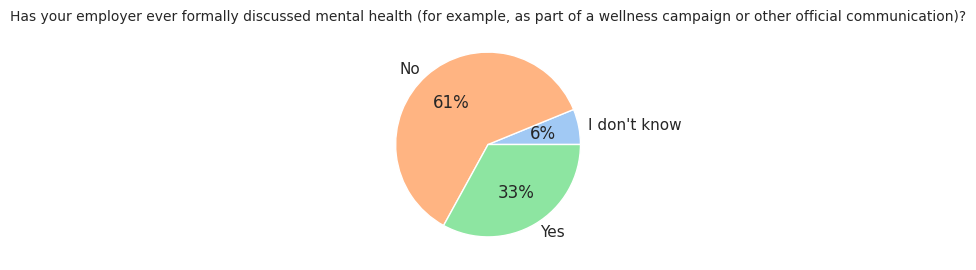

In [99]:
pie43= df3.groupby(['mencion_sm_empleador']).size().plot(kind='pie', autopct='%1.0f%%', title='Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', colors = colors, figsize=(3,3))
pie43.title.set_fontsize(10)

###¿Hablan los trabajadores de su salud mental con sus managers?

In [100]:
df3['conv_sm_empleador'].value_counts()

conv_sm_empleador
False    131
True      63
Name: count, dtype: int64

In [101]:
df3['conv_sm_empleador'] = df3['conv_sm_empleador'].replace({0.0: 'No', 1.0: 'Yes'})

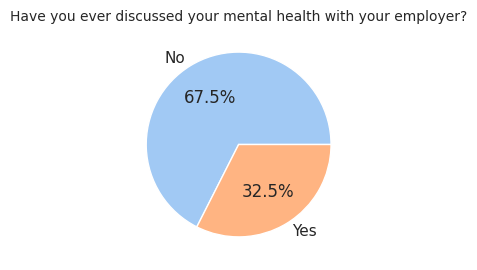

In [102]:
pie53= df3.groupby(['conv_sm_empleador']).size().plot(kind='pie', autopct='%1.1f%%', title='Have you ever discussed your mental health with your employer?', colors = colors, figsize=(3,3))
pie53.title.set_fontsize(10)

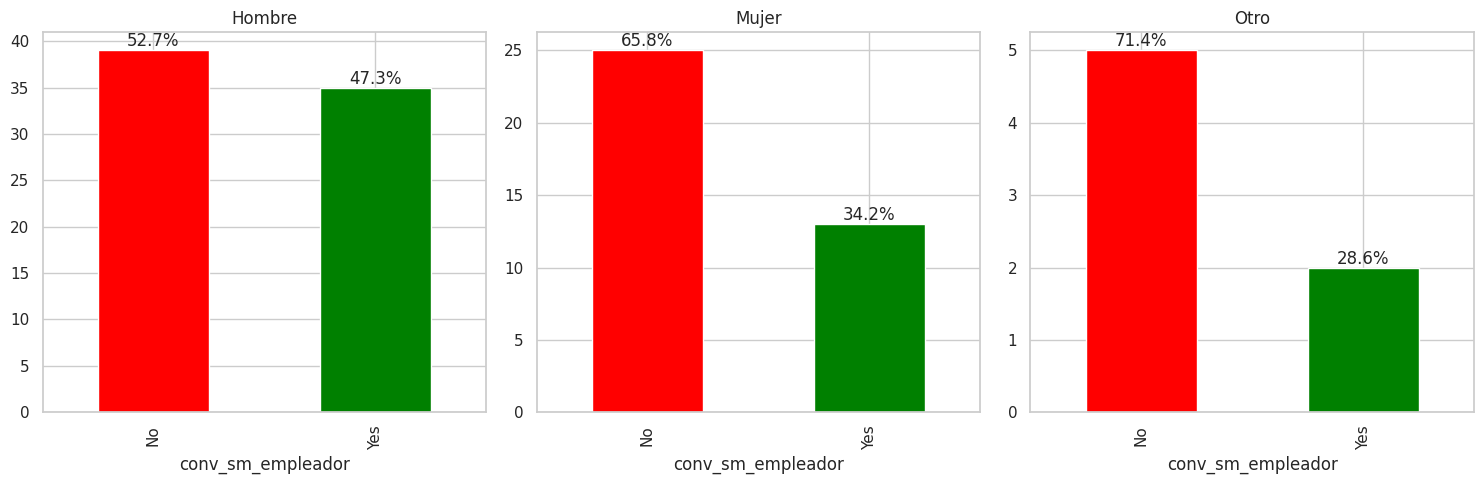

In [103]:
df_filtrado23 = df3[df3['problema_sm_act'].isin(['Yes', 'Possibly'])]

# Agrupar los datos por la variable 'sexo' y sumar los valores 'Yes' y 'No' en la variable 'conv_sm_empleador' para cada grupo
grupo_sexo = df_filtrado23.groupby('sexo')['conv_sm_empleador'].value_counts().unstack().fillna(0)

# Calcular el total de cada grupo de 'sexo'
totals = grupo_sexo.sum(axis=1)

# Graficar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Función para etiquetar las barras con el porcentaje
def etiquetar_barras(ax):
    for patch in ax.patches:
        height = patch.get_height()
        ax.annotate(f'{height / totals[ax.title.get_text()]:.1%}', (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom')

# Gráfico para Hombre
axs[0] = grupo_sexo.loc['Hombre'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0])
axs[0].set_title('Hombre')
etiquetar_barras(axs[0])

# Gráfico para Mujer
axs[1] = grupo_sexo.loc['Mujer'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[1])
axs[1].set_title('Mujer')
etiquetar_barras(axs[1])

# Gráfico para Otro
axs[2] = grupo_sexo.loc['Otro'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[2])
axs[2].set_title('Otro')
etiquetar_barras(axs[2])

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [104]:
df3['conv_sm_antiguo_emp'].value_counts()

conv_sm_antiguo_emp
False    125
True      44
Name: count, dtype: int64

In [105]:
df3['conv_sm_antiguo_emp'] = df3['conv_sm_antiguo_emp'].replace({0.0: 'No', 1.0: 'Yes'})

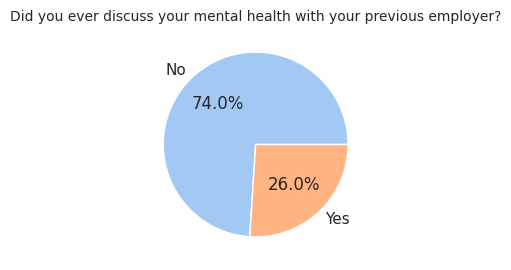

In [106]:
df_filtrado33 = df3[df3['problema_sm_act']=='Yes']
pie63= df3.groupby(['conv_sm_antiguo_emp']).size().plot(kind='pie', autopct='%1.1f%%', title='Did you ever discuss your mental health with your previous employer?', colors = colors, figsize=(3,3))
pie63.title.set_fontsize(10)

In [107]:
# Crear una tabla de contingencia
contingency_table3 = pd.crosstab(df3['conv_sm_empleador'], df3['conv_sm_antiguo_emp'])

# Mostrar la tabla de contingencia
print(contingency_table3)


conv_sm_antiguo_emp  No  Yes
conv_sm_empleador           
No                   95   21
Yes                  30   23


##Salud mental en el ambito personal

In [108]:
df3['entorno_familiar'].value_counts()

entorno_familiar
7     33
10    31
5     26
8     25
6     20
3     15
9     13
4     10
2      9
0      8
1      4
Name: count, dtype: int64

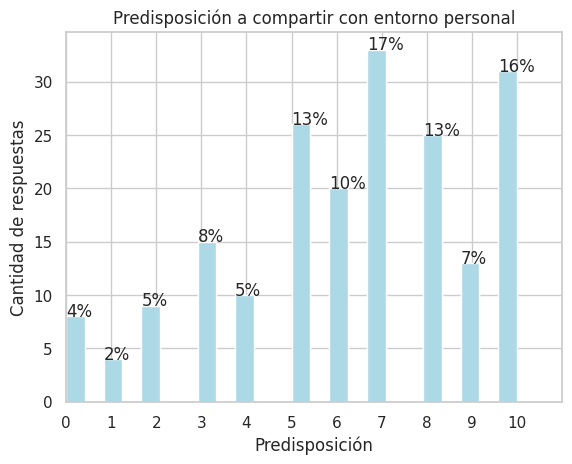

In [109]:
# Calcular los porcentajes
total_respuestas3 = len(df3['entorno_familiar'])
frecuencias, bins, _ = plt.hist(df3['entorno_familiar'], bins=24, color="lightblue")
porcentajes = [(count / total_respuestas3) * 100 for count in frecuencias]

# Graficar el histograma
plt.hist(df3['entorno_familiar'], bins=bins, color="lightblue")
plt.title('Predisposición a compartir con entorno personal')
plt.xlabel('Predisposición')
plt.ylabel('Cantidad de respuestas')

# Establecer los límites y las graduaciones del eje x
plt.xlim(0, 11)
plt.xticks(np.arange(0, 11, step=1))

# Añadir los porcentajes en el gráfico
for i, valor in enumerate(porcentajes):
    if valor > 0:
        plt.annotate(f'{valor:.0f}%', (bins[i], frecuencias[i]))

# Mostrar el gráfico
plt.show()

#Datos 2020

In [110]:
df20= pd.read_csv("/2020.csv")

In [111]:
#Comprobación del número de filas y columnas que tiene el archivo
print("Tamaño del archivo:",df20.shape)
#Comprobacion del numero de valores NA
print(df20.isna().sum().head(5))
#Existen variables con muchos valores nulos o NA, se eliminan aquellas cuyos valores NA sean mayores al 85%
valor_max_na = (0.9 * len(df20))
df20 = df20.loc[:,(df20.isnull().sum(axis = 0) <= valor_max_na)] #se indica axis = 0 para tener en cuenta el número de valores nulos por columna, es decir, por variable.
print("Tamaño después de eliminar columnas de valores nulos:",df20.shape)
print(df20.keys())
print("---------------------------")

Tamaño del archivo: (180, 120)
#                                                                0
*Are you self-employed?*                                         0
How many employees does your company or organization have?      25
Is your employer primarily a tech company/organization?         25
Is your primary role within your company related to tech/IT?    25
dtype: int64
Tamaño después de eliminar columnas de valores nulos: (180, 81)
Index(['#', '*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campai

In [112]:
nombres_col20 = {
    '*Are you self-employed?*':'autonomo',
    'How many employees does your company or organization have?':'num_emp',
    'Is your employer primarily a tech company/organization?':'empresa_tec',
    'Is your primary role within your company related to tech/IT?':'puesto_tec',
    'Does your employer provide mental health benefits as part of healthcare coverage?':'beneficio',
    'Do you know the options for mental health care available under your employer-provided health coverage?':'info_opciones_sm',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'mencion_sm_empleador',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?':'oferta_recursos_sm',
    'Have you ever discussed your mental health with your employer?':'conv_sm_empleador',
    'Have you ever discussed your mental health with coworkers?':'conv_sm_comp',
    'Overall, how much importance does your employer place on physical health?':'imp_saludfisica',
    'Overall, how much importance does your employer place on mental health?':'imp_saludmental',
    'Did you ever discuss your mental health with your previous employer?':'conv_sm_antiguo_emp',
    'Did you ever discuss your mental health with a previous coworker(s)?':'conv_sm_antiguo_comp',
    'Do you *currently* have a mental health disorder?':'problema_sm_act',
    'Have you had a mental health disorder in the past?':'problema_sm_pasado',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?':'tratamiento_sm',
    'Do you have a family history of mental illness?':'historial_familiar',
    'How willing would you be to share with friends and family that you have a mental illness?':'entorno_familiar',
    'What is your age?':'edad',
    'What is your gender?':'sexo',
    'What country do you *live* in?':'pais'}


In [113]:
#selección de las columnas deseadas para hacer el análisis
col_selec = nombres_col20.keys()
df4 = df20[col_selec].copy()
#col_quitar = [item for item in df17.columns if item not in col_selec]
#df17.drop(columns = col_quitar, inplace = True, errors = 'ignore')
print('Tamaño sin columnas no deseadas: ', df4.shape)
print(df4.keys())

Tamaño sin columnas no deseadas:  (180, 22)
Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Have you ever discussed your mental health with your employer?',
       'Have you ever discussed your mental health with coworkers?',
       'Overall, how much importance does your employer place on physical health?',
       'Overall, how

In [114]:
#Renombramiento de las columnas para facilitar su tratamiento y análisis
df4.rename(columns = nombres_col20, inplace = True, errors = 'ignore')
print(df4.keys())

Index(['autonomo', 'num_emp', 'empresa_tec', 'puesto_tec', 'beneficio',
       'info_opciones_sm', 'mencion_sm_empleador', 'oferta_recursos_sm',
       'conv_sm_empleador', 'conv_sm_comp', 'imp_saludfisica',
       'imp_saludmental', 'conv_sm_antiguo_emp', 'conv_sm_antiguo_comp',
       'problema_sm_act', 'problema_sm_pasado', 'tratamiento_sm',
       'historial_familiar', 'entorno_familiar', 'edad', 'sexo', 'pais'],
      dtype='object')


## Tratamiento de las variables

###Variable puesto_tec

In [115]:
df4['puesto_tec'].value_counts()

puesto_tec
1.0    141
0.0     14
Name: count, dtype: int64

In [116]:
#Eliminar las personas que no tienen un puesto tecnológico porque son insuficientes
df4.drop(df4[df4['puesto_tec'] == 0.0].index, inplace = True)

### Variable sexo

In [117]:
df4['sexo'].value_counts()

sexo
Male               66
male               31
Female             22
female             20
F                   9
M                   4
f                   2
m                   2
Woman               2
mail                1
FEMALE              1
female, she/her     1
mostly male         1
cisgender male      1
MAle                1
Name: count, dtype: int64

In [118]:
df4['sexo'] = df4['sexo'].str.lower().str.strip()

In [119]:
#Redistribución de la variable sexo para englobar dentro de hombre, mujer y otros
sexo_masculino = ['male', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male','male/androgynous','male (hey this is the tech industry you\'re talking about)','male, cis','homem cis','malel','i have a penis']
sexo_femenino = ['female', 'f', 'woman', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female','female-ish','woman-identified','female-identified']
sexo_otro = ['agender', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer','male (or female, or both)','rr','i am a wookie']

df4['sexo'] = df4['sexo'].replace(sexo_masculino, 'Hombre')
df4['sexo'] = df4['sexo'].replace(sexo_femenino, 'Mujer')
df4['sexo'] = df4['sexo'].replace(sexo_otro, 'Otro')

df4['sexo'] = df4['sexo'].fillna('Otro')

df4['sexo'].value_counts()

sexo
Hombre    107
Mujer      57
Otro        2
Name: count, dtype: int64

###Variable edad

In [120]:
df4['edad'].describe()

count    166.000000
mean      34.138554
std       10.018714
min        1.000000
25%       27.000000
50%       32.000000
75%       40.000000
max       63.000000
Name: edad, dtype: float64

##Análisis general de los trabajadores en puestos tecnológicos, estudiando su distribución por sexo y edad.

In [121]:
df4['problema_sm_act'].describe()

count     166
unique      4
top        No
freq       54
Name: problema_sm_act, dtype: object

In [122]:
colors = sns.color_palette('pastel')[0:6]

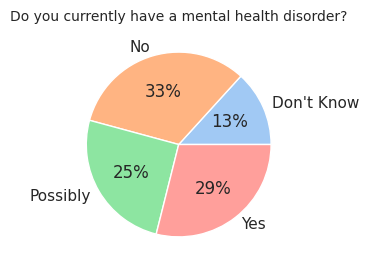

In [123]:
pie14= df4.groupby(['problema_sm_act']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you currently have a mental health disorder?', colors = colors, figsize=(3,3))
pie14.title.set_fontsize(10)


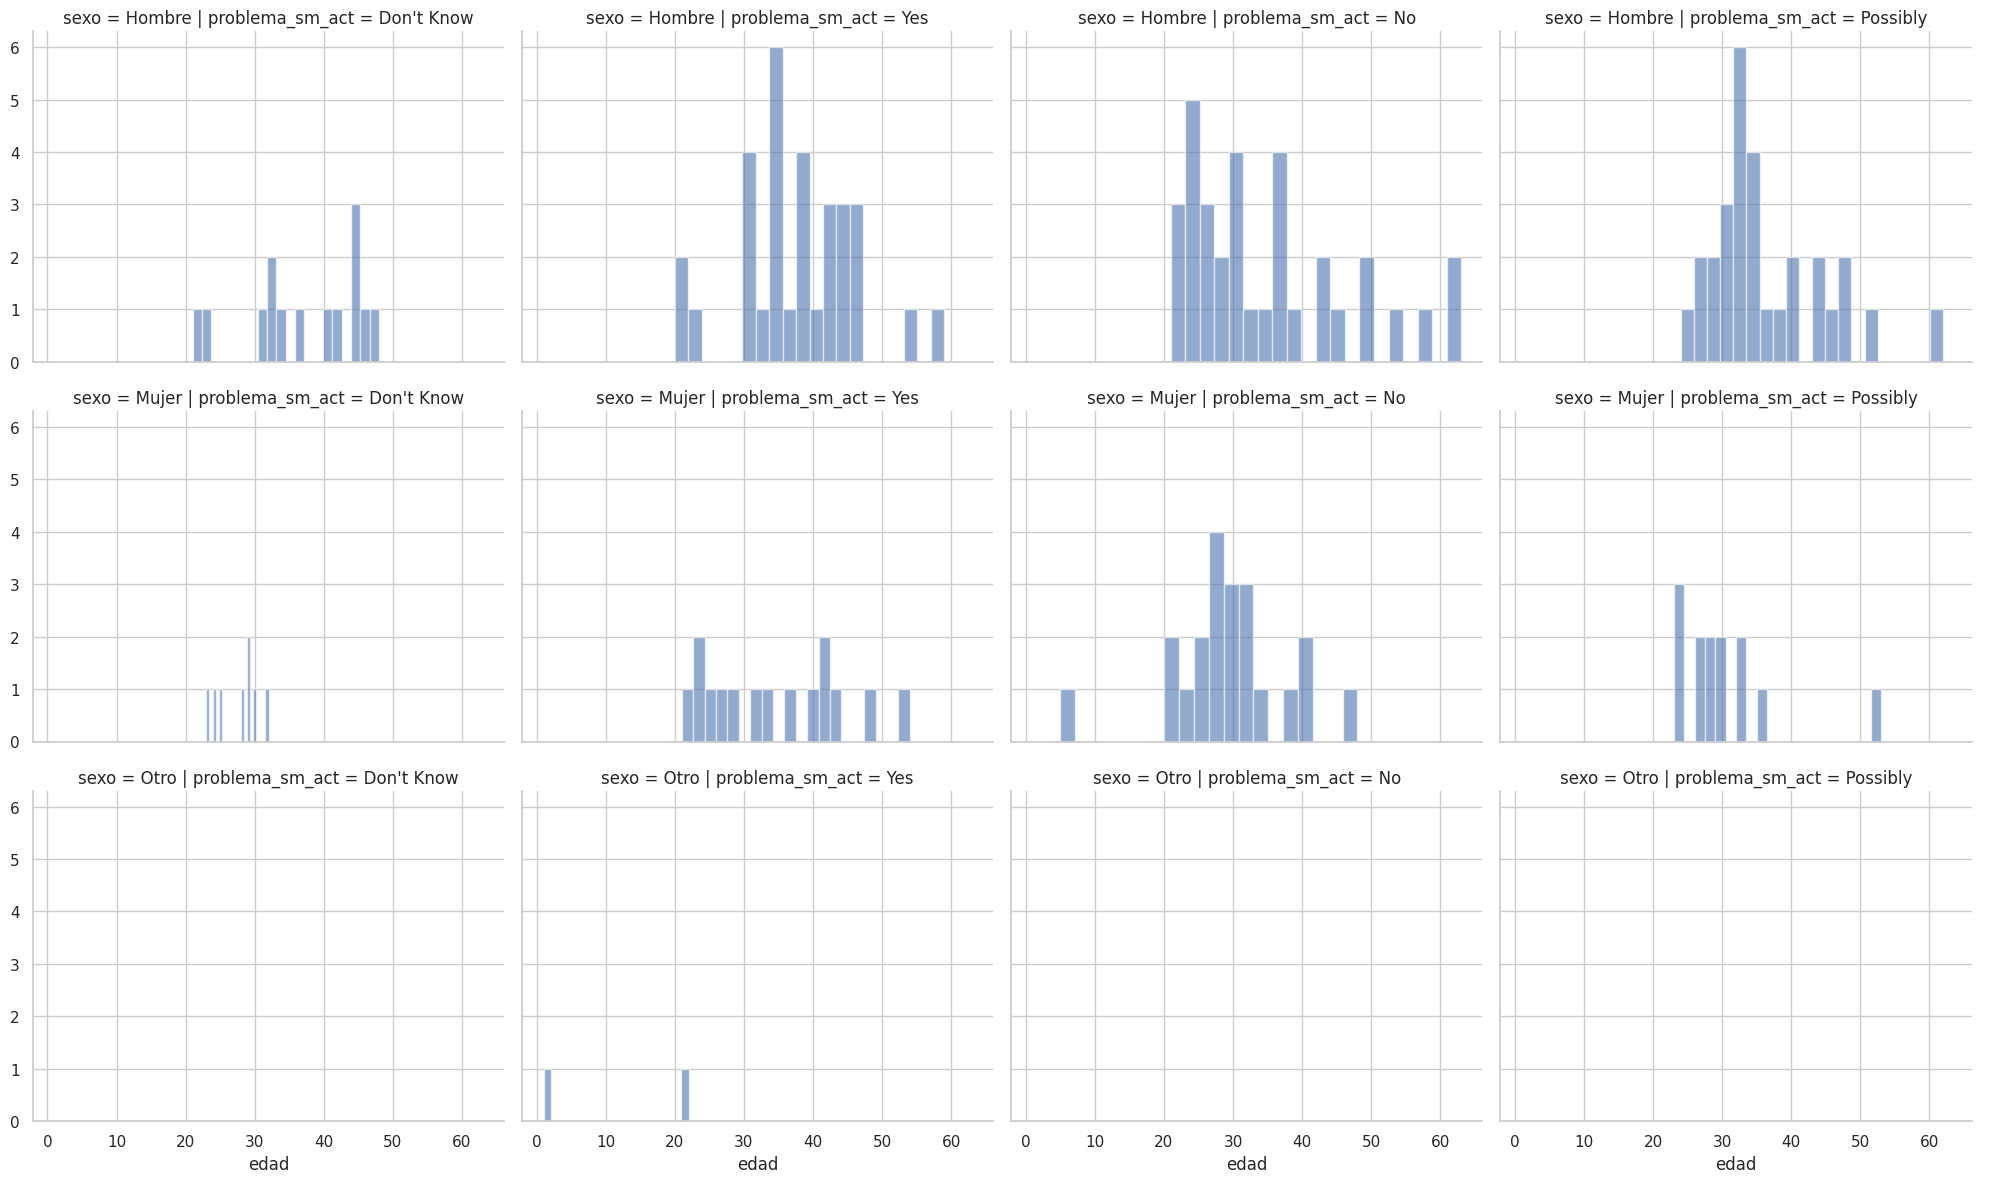

In [124]:
g4 = sns.FacetGrid(df4, row = 'sexo', col = 'problema_sm_act', height = 4,aspect=1.25)
g4.map(plt.hist, 'edad', bins = 20, alpha = 0.6)
g4.add_legend()
plt.show()

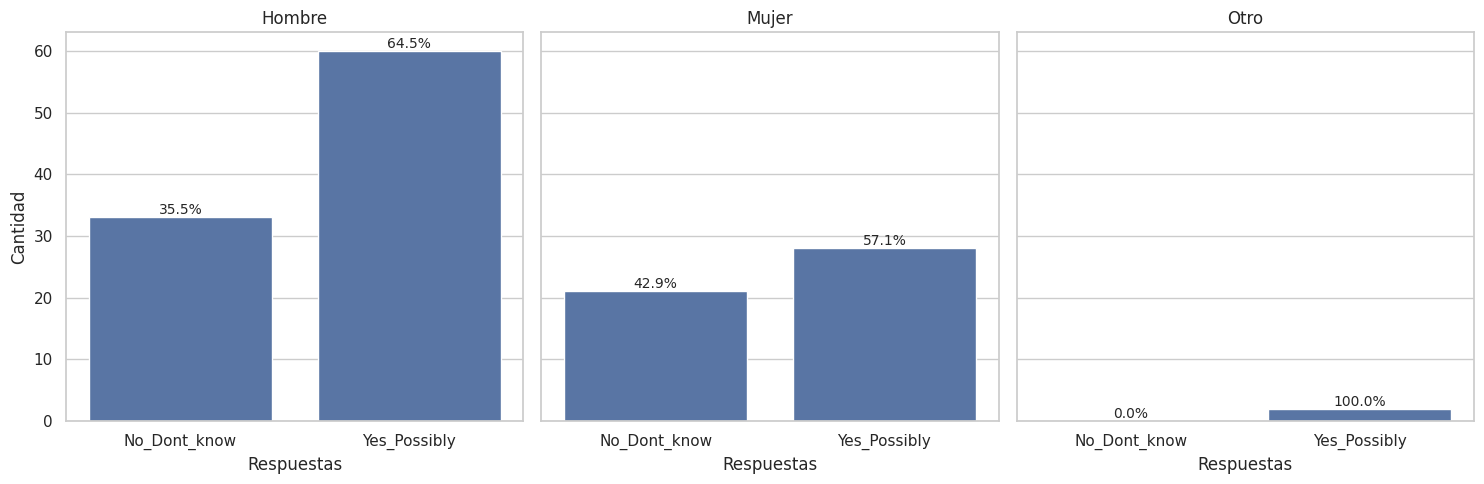

In [125]:
df_filtered4 = df4[df4['problema_sm_act'].isin(['Yes', 'Possibly', 'No', "Don't know"])].copy()  # Usamos .copy() para evitar el SettingWithCopyWarning

# Crear una nueva columna para clasificar las respuestas en dos categorías: 'Yes_Possibly' y 'No_Dont_know'
df_filtered4.loc[:, 'respuesta_categorizada'] = df_filtered4['problema_sm_act'].apply(lambda x: 'Yes_Possibly' if x in ['Yes', 'Possibly'] else 'No_Dont_know')

# Sumarizar los datos por sexo y categoría de respuesta
summary = df_filtered4.groupby(['sexo', 'respuesta_categorizada']).size().unstack(fill_value=0)

# Calcular el total de respuestas en cada gráfico
total_respuestas = summary.sum(axis=1)

# Calcular el porcentaje de cada categoría con respecto al total de respuestas
porcentaje = (summary.T / total_respuestas).T * 100

# Graficar los datos
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (sexo, data) in enumerate(summary.iterrows()):
    sns.barplot(x=data.index, y=data.values, ax=axes[i])

    # Mostrar porcentaje encima de cada barra
    for j, valor in enumerate(data):
        axes[i].text(j, valor + 0.5, f'{porcentaje.iloc[i, j]:.1f}%', ha='center', fontsize=10)

    axes[i].set_title(sexo)
    axes[i].set_ylabel('Cantidad')
    axes[i].set_xlabel('Respuestas')

plt.tight_layout()
plt.show()

##Salud mental en el ambito laboral (empresas tecnológicas)

###Selección de datos

In [126]:
df4['autonomo'].value_counts()

autonomo
0    141
1     25
Name: count, dtype: int64

In [127]:
#Eliminar los autónomos para medir lel tratamiento de la salud mental en las empresas
df4.drop(df4[df4['autonomo'] == 1.0].index, inplace = True)

In [128]:
print(df4.shape)

(141, 22)


In [129]:
df4['empresa_tec'].value_counts()

empresa_tec
1.0    96
0.0    45
Name: count, dtype: int64

In [130]:
#Eliminar los trabajadores que no forman parte de empresas tecnológicas
df4.drop(df4[df4['empresa_tec'] == 0.0].index, inplace = True)

In [131]:
print(df4.shape)

(96, 22)


###Porcentaje de cobertura

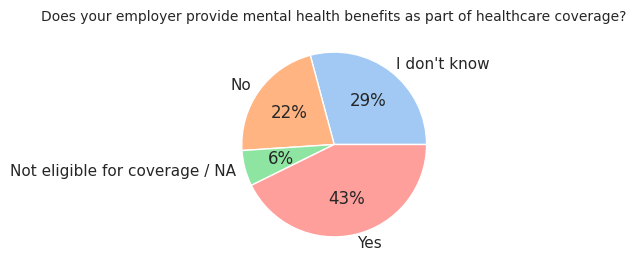

In [132]:
pie24= df4.groupby(['beneficio']).size().plot(kind='pie', autopct='%1.0f%%', title='Does your employer provide mental health benefits as part of healthcare coverage?', colors = colors, figsize=(3,3))
pie24.title.set_fontsize(10)


###¿Conocen los trabajadores las opciones en materia de salud mental recogidas en su cobertura sanitaria?

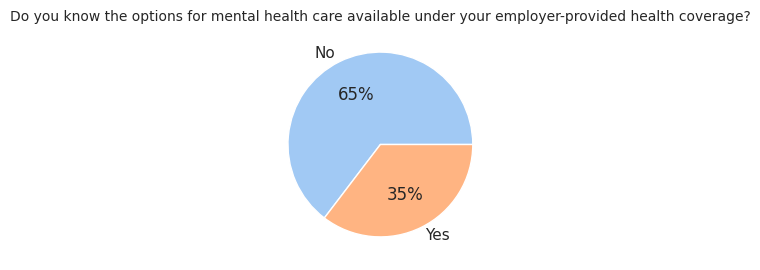

In [133]:
pie34= df4.groupby(['info_opciones_sm']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you know the options for mental health care available under your employer-provided health coverage?', colors = colors, figsize=(3,3))
pie34.title.set_fontsize(10)

###¿Es frecuente que se mencione la salud mental por parte de las empresas?

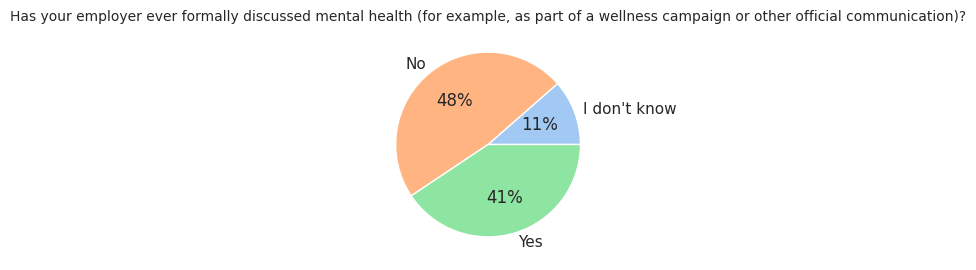

In [134]:
pie44= df4.groupby(['mencion_sm_empleador']).size().plot(kind='pie', autopct='%1.0f%%', title='Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', colors = colors, figsize=(3,3))
pie44.title.set_fontsize(10)

###¿Hablan los trabajadores de su salud mental con sus managers?

In [135]:
df4['conv_sm_empleador'].value_counts()

conv_sm_empleador
0.0    66
1.0    30
Name: count, dtype: int64

In [136]:
df4['conv_sm_empleador'] = df4['conv_sm_empleador'].replace({0.0: 'No', 1.0: 'Yes'})

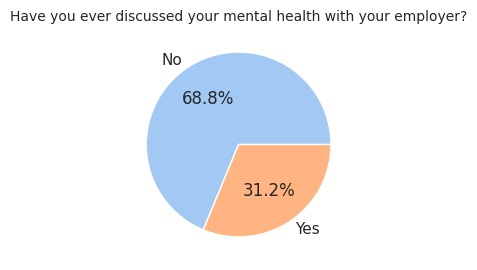

In [137]:
pie54= df4.groupby(['conv_sm_empleador']).size().plot(kind='pie', autopct='%1.1f%%', title='Have you ever discussed your mental health with your employer?', colors = colors, figsize=(3,3))
pie54.title.set_fontsize(10)

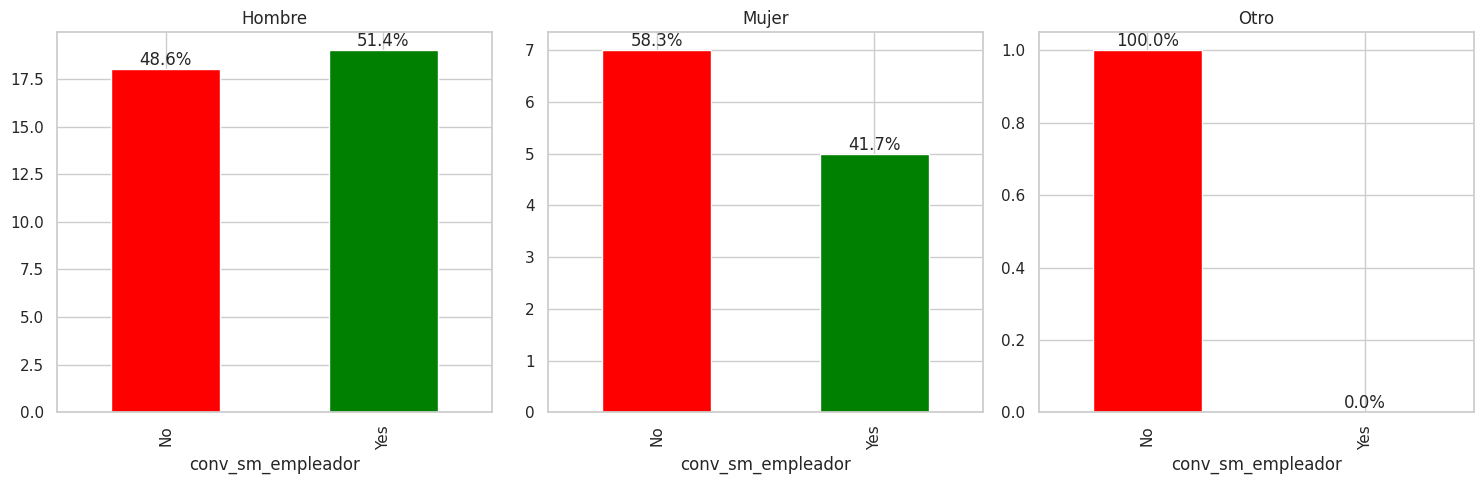

In [138]:
df_filtrado24 = df4[df4['problema_sm_act'].isin(['Yes', 'Possibly'])]

# Agrupar los datos por la variable 'sexo' y sumar los valores 'Yes' y 'No' en la variable 'conv_sm_empleador' para cada grupo
grupo_sexo = df_filtrado24.groupby('sexo')['conv_sm_empleador'].value_counts().unstack().fillna(0)

# Calcular el total de cada grupo de 'sexo'
totals = grupo_sexo.sum(axis=1)

# Graficar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Función para etiquetar las barras con el porcentaje
def etiquetar_barras(ax):
    for patch in ax.patches:
        height = patch.get_height()
        ax.annotate(f'{height / totals[ax.title.get_text()]:.1%}', (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom')

# Gráfico para Hombre
axs[0] = grupo_sexo.loc['Hombre'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0])
axs[0].set_title('Hombre')
etiquetar_barras(axs[0])

# Gráfico para Mujer
axs[1] = grupo_sexo.loc['Mujer'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[1])
axs[1].set_title('Mujer')
etiquetar_barras(axs[1])

# Gráfico para Otro
axs[2] = grupo_sexo.loc['Otro'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[2])
axs[2].set_title('Otro')
etiquetar_barras(axs[2])

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [139]:
df4['conv_sm_antiguo_emp'].value_counts()

conv_sm_antiguo_emp
0.0    60
1.0    14
Name: count, dtype: int64

In [140]:
df4['conv_sm_antiguo_emp'] = df4['conv_sm_antiguo_emp'].replace({0.0: 'No', 1.0: 'Yes'})

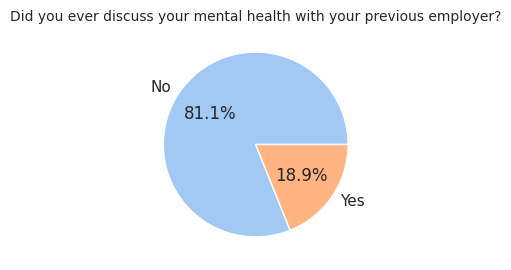

In [141]:
df_filtrado34 = df4[df4['problema_sm_act']=='Yes']
pie64= df4.groupby(['conv_sm_antiguo_emp']).size().plot(kind='pie', autopct='%1.1f%%', title='Did you ever discuss your mental health with your previous employer?', colors = colors, figsize=(3,3))
pie64.title.set_fontsize(10)

In [142]:
# Crear una tabla de contingencia
contingency_table4 = pd.crosstab(df4['conv_sm_empleador'], df4['conv_sm_antiguo_emp'])

# Mostrar la tabla de contingencia
print(contingency_table4)


conv_sm_antiguo_emp  No  Yes
conv_sm_empleador           
No                   44    4
Yes                  16   10


##Salud mental en el ambito personal

In [143]:
df4['entorno_familiar'].value_counts()

entorno_familiar
7     16
8     16
5     14
10    13
9     10
6      6
0      5
3      5
4      5
2      3
1      3
Name: count, dtype: int64

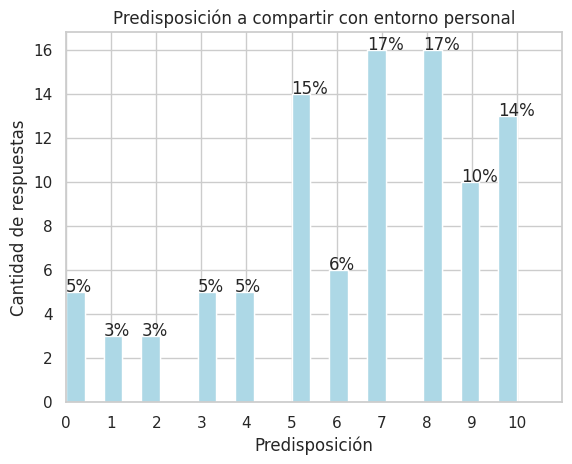

In [144]:
# Calcular los porcentajes
total_respuestas4 = len(df4['entorno_familiar'])
frecuencias, bins, _ = plt.hist(df4['entorno_familiar'], bins=24, color="lightblue")
porcentajes = [(count / total_respuestas4) * 100 for count in frecuencias]

# Graficar el histograma
plt.hist(df4['entorno_familiar'], bins=bins, color="lightblue")
plt.title('Predisposición a compartir con entorno personal')
plt.xlabel('Predisposición')
plt.ylabel('Cantidad de respuestas')

# Establecer los límites y las graduaciones del eje x
plt.xlim(0, 11)
plt.xticks(np.arange(0, 11, step=1))

# Añadir los porcentajes en el gráfico
for i, valor in enumerate(porcentajes):
    if valor > 0:
        plt.annotate(f'{valor:.0f}%', (bins[i], frecuencias[i]))

# Mostrar el gráfico
plt.show()

#Datos 2021

In [145]:
df21= pd.read_csv("/2021.csv")

In [146]:
#Comprobación del número de filas y columnas que tiene el archivo
print("Tamaño del archivo:",df21.shape)
#Comprobacion del numero de valores NA
print(df21.isna().sum().head(5))
#Existen variables con muchos valores nulos o NA, se eliminan aquellas cuyos valores NA sean mayores al 85%
valor_max_na = (0.9 * len(df21))
df21 = df21.loc[:,(df21.isnull().sum(axis = 0) <= valor_max_na)] #se indica axis = 0 para tener en cuenta el número de valores nulos por columna, es decir, por variable.
print("Tamaño después de eliminar columnas de valores nulos:",df21.shape)
print(df21.keys())
print("---------------------------")

Tamaño del archivo: (131, 124)
#                                                                0
*Are you self-employed?*                                         0
How many employees does your company or organization have?      17
Is your employer primarily a tech company/organization?         17
Is your primary role within your company related to tech/IT?    17
dtype: int64
Tamaño después de eliminar columnas de valores nulos: (131, 83)
Index(['#', '*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campai

In [147]:
nombres_col21 = {
    '*Are you self-employed?*':'autonomo',
    'How many employees does your company or organization have?':'num_emp',
    'Is your employer primarily a tech company/organization?':'empresa_tec',
    'Is your primary role within your company related to tech/IT?':'puesto_tec',
    'Does your employer provide mental health benefits as part of healthcare coverage?':'beneficio',
    'Do you know the options for mental health care available under your employer-provided health coverage?':'info_opciones_sm',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'mencion_sm_empleador',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?':'oferta_recursos_sm',
    'Have you ever discussed your mental health with your employer?':'conv_sm_empleador',
    'Have you ever discussed your mental health with coworkers?':'conv_sm_comp',
    'Overall, how much importance does your employer place on physical health?':'imp_saludfisica',
    'Overall, how much importance does your employer place on mental health?':'imp_saludmental',
    'Did you ever discuss your mental health with your previous employer?':'conv_sm_antiguo_emp',
    'Did you ever discuss your mental health with a previous coworker(s)?':'conv_sm_antiguo_comp',
    'Do you *currently* have a mental health disorder?':'problema_sm_act',
    'Have you had a mental health disorder in the past?':'problema_sm_pasado',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?':'tratamiento_sm',
    'Do you have a family history of mental illness?':'historial_familiar',
    'How willing would you be to share with friends and family that you have a mental illness?':'entorno_familiar',
    'What is your age?':'edad',
    'What is your gender?':'sexo',
    'What country do you *live* in?':'pais'}


In [148]:
#selección de las columnas deseadas para hacer el análisis
col_selec = nombres_col21.keys()
df5 = df21[col_selec].copy()
#col_quitar = [item for item in df17.columns if item not in col_selec]
#df17.drop(columns = col_quitar, inplace = True, errors = 'ignore')
print('Tamaño sin columnas no deseadas: ', df5.shape)
print(df5.keys())

Tamaño sin columnas no deseadas:  (131, 22)
Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Have you ever discussed your mental health with your employer?',
       'Have you ever discussed your mental health with coworkers?',
       'Overall, how much importance does your employer place on physical health?',
       'Overall, how

In [149]:
#Renombramiento de las columnas para facilitar su tratamiento y análisis
df5.rename(columns = nombres_col21, inplace = True, errors = 'ignore')
print(df5.keys())

Index(['autonomo', 'num_emp', 'empresa_tec', 'puesto_tec', 'beneficio',
       'info_opciones_sm', 'mencion_sm_empleador', 'oferta_recursos_sm',
       'conv_sm_empleador', 'conv_sm_comp', 'imp_saludfisica',
       'imp_saludmental', 'conv_sm_antiguo_emp', 'conv_sm_antiguo_comp',
       'problema_sm_act', 'problema_sm_pasado', 'tratamiento_sm',
       'historial_familiar', 'entorno_familiar', 'edad', 'sexo', 'pais'],
      dtype='object')


## Tratamiento de las variables

### Variable puesto_tec

In [150]:
df5['puesto_tec'].value_counts()

puesto_tec
1.0    99
0.0    15
Name: count, dtype: int64

In [151]:
#Eliminar aquellos individuos que no tengan un puesto tecnológico
df5.drop(df5[df5['puesto_tec'] == 0.0].index, inplace = True)

### Variable sexo

In [152]:
df5['sexo'].value_counts()

sexo
Male                  38
Female                25
male                  17
female                14
woman                  3
m                      3
f                      2
homem cis              1
Non-binary             1
M                      1
cis male               1
FEMALE                 1
Female (cis)           1
male/he/him            1
b                      1
Masculine              1
MALE                   1
afab non-binary        1
Non-binary/Agender     1
Name: count, dtype: int64

In [153]:
df5['sexo'] = df5['sexo'].str.lower().str.strip()

In [154]:
#Redistribución de la variable sexo para englobar dentro de hombre, mujer y otros
sexo_masculino = ['male', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male','male/androgynous','male (hey this is the tech industry you\'re talking about)','male, cis','homem cis','malel','i have a penis']
sexo_femenino = ['female', 'f', 'woman', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female','female-ish','woman-identified','female-identified']
sexo_otro = ['agender', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer','male (or female, or both)','rr','i am a wookie']

df5['sexo'] = df5['sexo'].replace(sexo_masculino, 'Hombre')
df5['sexo'] = df5['sexo'].replace(sexo_femenino, 'Mujer')
df5['sexo'] = df5['sexo'].replace(sexo_otro, 'Otro')

df5['sexo'] = df5['sexo'].fillna('Otro')

df5['sexo'].value_counts()

sexo
Hombre    64
Mujer     46
Otro       6
Name: count, dtype: int64

###Variable edad

In [155]:
df5['edad'].describe()

count    116.000000
mean      33.267241
std       19.901653
min       11.000000
25%       25.000000
50%       30.000000
75%       37.250000
max      223.000000
Name: edad, dtype: float64

In [156]:
# Obtener media
edad_media = df5[(df5["edad"] >= 18) | (df5["edad"] <= 75)]["edad"].mean()

# Reemplazar las irregularidades con la edad media
df5["edad"].replace(to_replace = df5[(df5["edad"] < 18) | (df5["edad"] > 75)]["edad"].tolist(), value = edad_media, inplace = True)

df5['edad'].describe()

count    116.000000
mean      31.823573
std        8.753931
min       19.000000
25%       25.000000
50%       30.500000
75%       37.000000
max       63.000000
Name: edad, dtype: float64

##Análisis general de los trabajadores en puestos tecnológicos, estudiando su distribución por sexo y edad.

In [157]:
df5['problema_sm_act'].describe()

count     116
unique      4
top        No
freq       43
Name: problema_sm_act, dtype: object

In [158]:
df5['problema_sm_act'].value_counts()

problema_sm_act
No            43
Yes           37
Possibly      23
Don't Know    13
Name: count, dtype: int64

In [159]:
colors = sns.color_palette('pastel')[0:6]

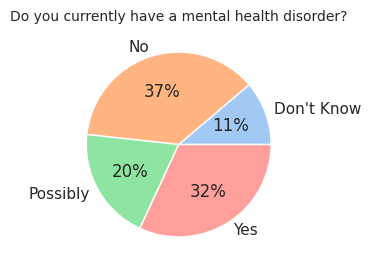

In [160]:
pie15= df5.groupby(['problema_sm_act']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you currently have a mental health disorder?', colors = colors, figsize=(3,3))
pie15.title.set_fontsize(10)


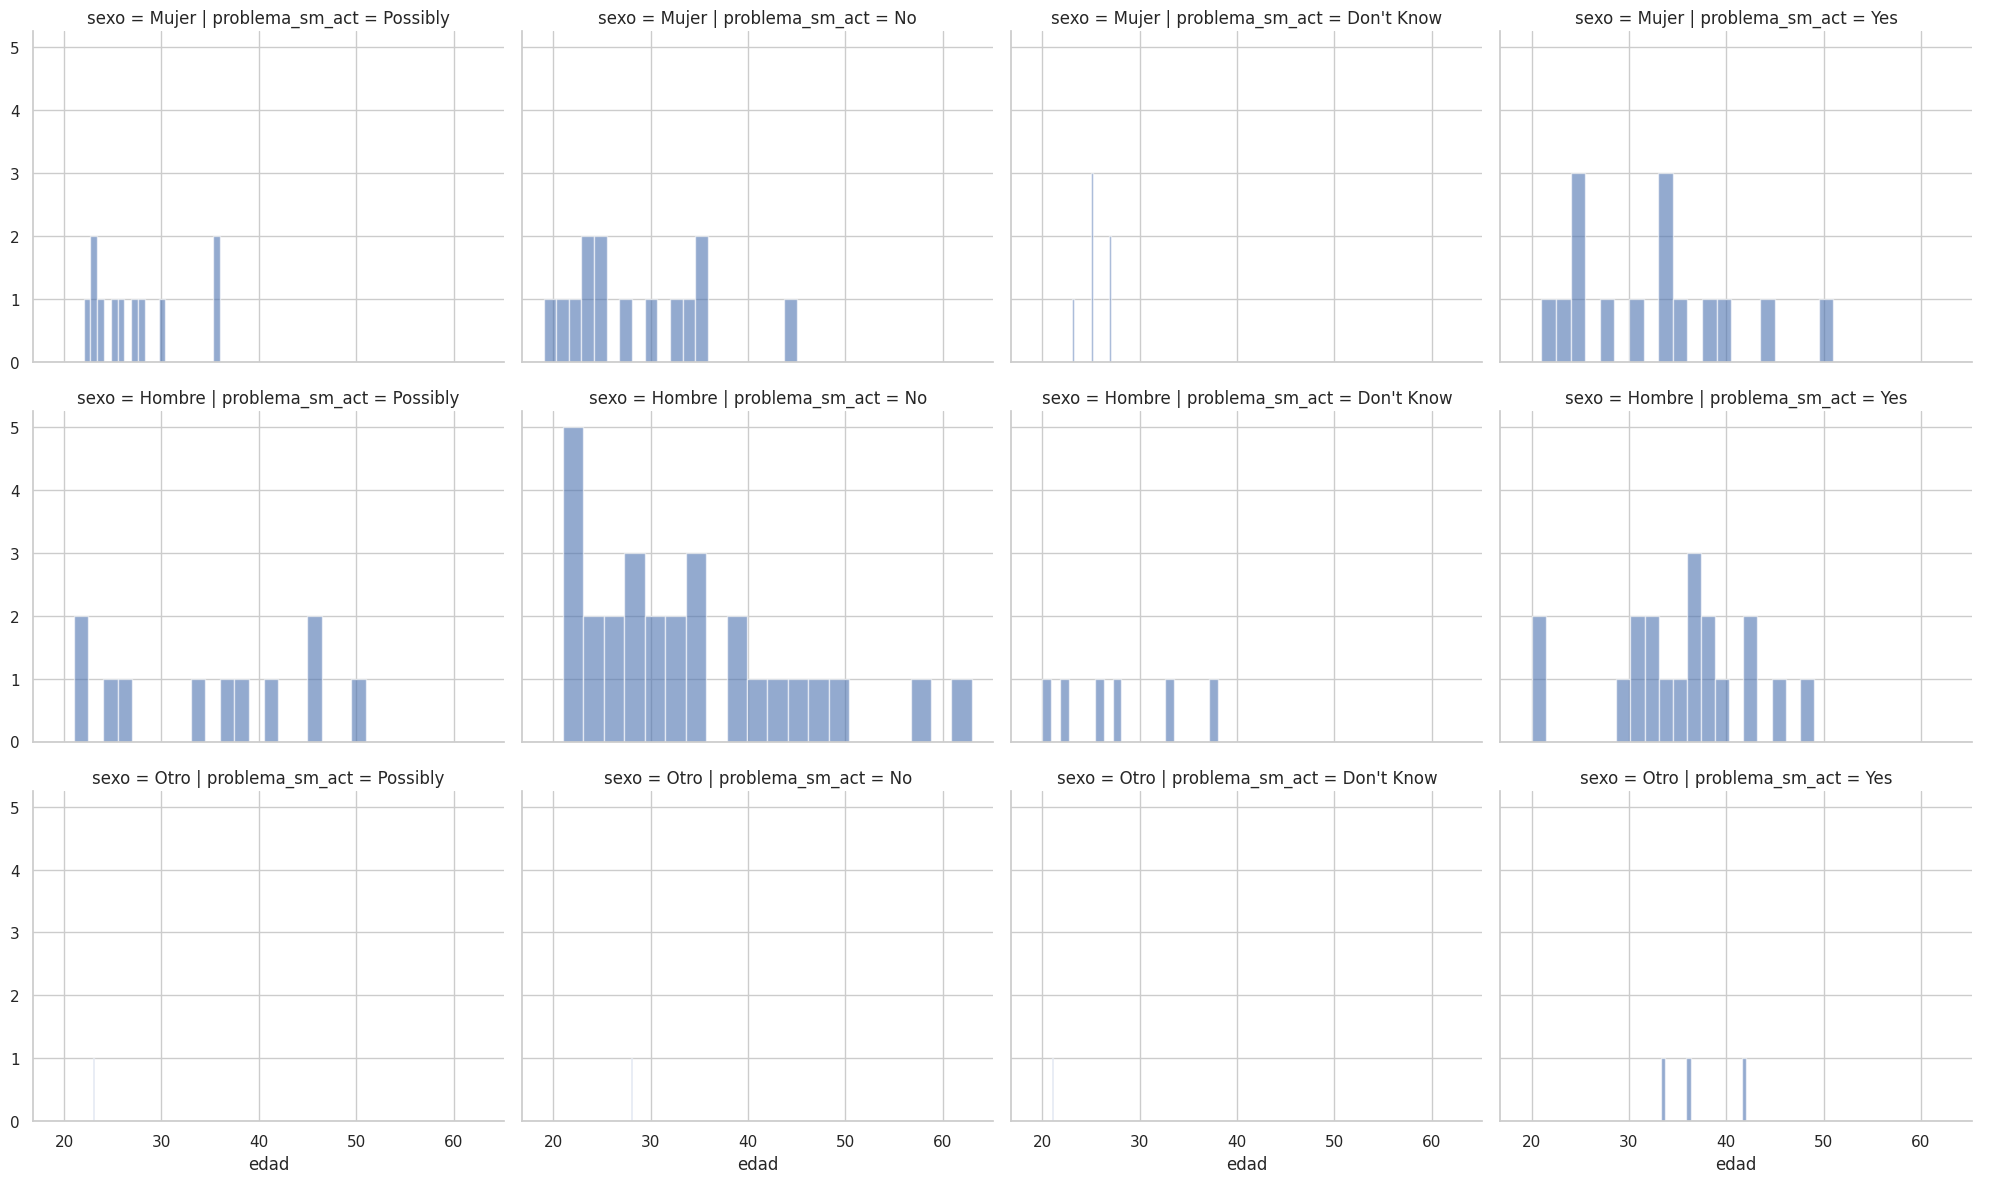

In [161]:
g5 = sns.FacetGrid(df5, row = 'sexo', col = 'problema_sm_act', height = 4,aspect=1.25)
g5.map(plt.hist, 'edad', bins = 20, alpha = 0.6)
g5.add_legend()
plt.show()

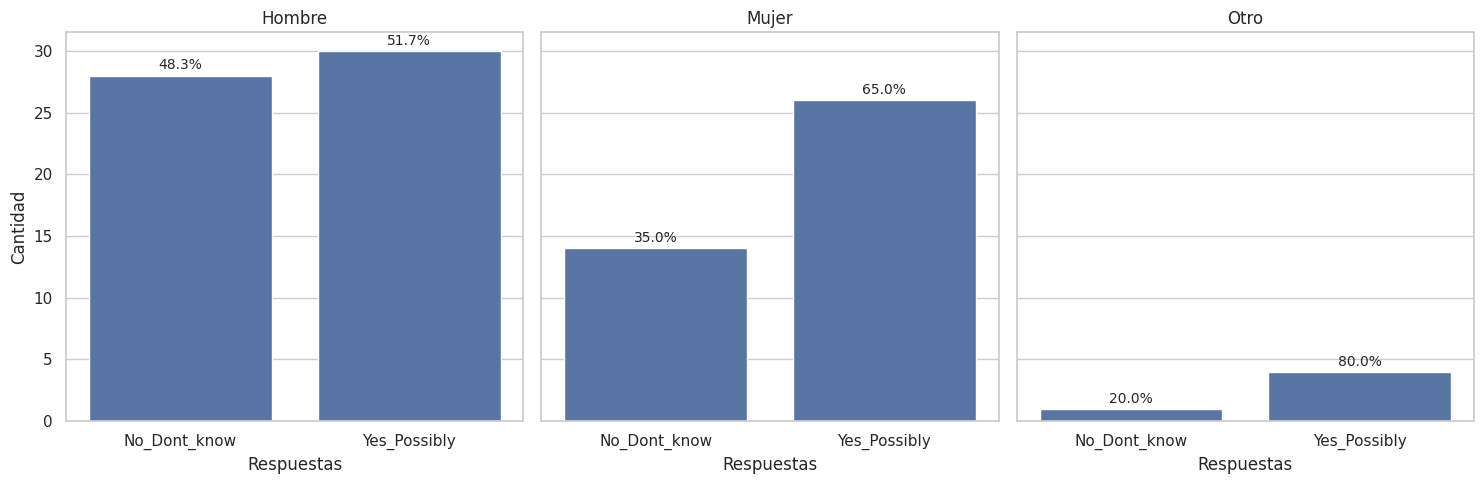

In [162]:
df_filtered5 = df5[df5['problema_sm_act'].isin(['Yes', 'Possibly', 'No', "Don't know"])].copy()  # Usamos .copy() para evitar el SettingWithCopyWarning

# Crear una nueva columna para clasificar las respuestas en dos categorías: 'Yes_Possibly' y 'No_Dont_know'
df_filtered5.loc[:, 'respuesta_categorizada'] = df_filtered5['problema_sm_act'].apply(lambda x: 'Yes_Possibly' if x in ['Yes', 'Possibly'] else 'No_Dont_know')

# Sumarizar los datos por sexo y categoría de respuesta
summary = df_filtered5.groupby(['sexo', 'respuesta_categorizada']).size().unstack(fill_value=0)

# Calcular el total de respuestas en cada gráfico
total_respuestas = summary.sum(axis=1)

# Calcular el porcentaje de cada categoría con respecto al total de respuestas
porcentaje = (summary.T / total_respuestas).T * 100

# Graficar los datos
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (sexo, data) in enumerate(summary.iterrows()):
    sns.barplot(x=data.index, y=data.values, ax=axes[i])

    # Mostrar porcentaje encima de cada barra
    for j, valor in enumerate(data):
        axes[i].text(j, valor + 0.5, f'{porcentaje.iloc[i, j]:.1f}%', ha='center', fontsize=10)

    axes[i].set_title(sexo)
    axes[i].set_ylabel('Cantidad')
    axes[i].set_xlabel('Respuestas')

plt.tight_layout()
plt.show()

##Salud mental en el ambito laboral (empresas tecnológicas)

###Selección de datos

In [163]:
df5['autonomo'].value_counts()

autonomo
0    99
1    17
Name: count, dtype: int64

In [164]:
#Eliminar los autónomos para medir lel tratamiento de la salud mental en las empresas
df5.drop(df5[df5['autonomo'] == 1.0].index, inplace = True)

In [165]:
print(df5.shape)

(99, 22)


In [166]:
df5['empresa_tec'].value_counts()

empresa_tec
1.0    67
0.0    32
Name: count, dtype: int64

In [167]:
#Eliminar los individuos que no trabajan en una empresa tecnológica por ser muy pocos
df5.drop(df5[df5['empresa_tec'] == 0.0].index, inplace = True)

In [168]:
print(df5.shape)

(67, 22)


###Porcentaje de cobertura

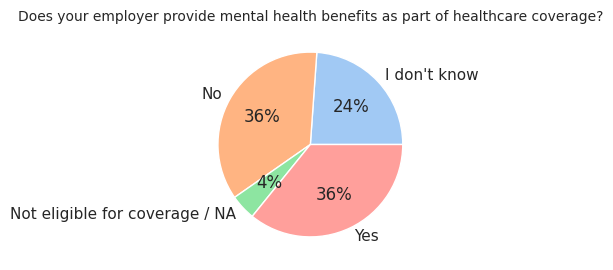

In [169]:
pie25= df5.groupby(['beneficio']).size().plot(kind='pie', autopct='%1.0f%%', title='Does your employer provide mental health benefits as part of healthcare coverage?', colors = colors, figsize=(3,3))
pie25.title.set_fontsize(10)


###¿Conocen los trabajadores las opciones en materia de salud mental recogidas en su cobertura sanitaria?

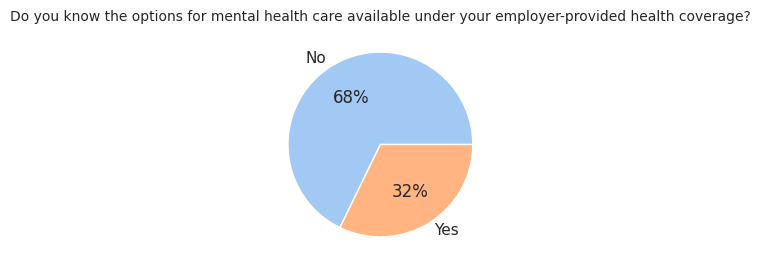

In [170]:
pie35= df5.groupby(['info_opciones_sm']).size().plot(kind='pie', autopct='%1.0f%%', title='Do you know the options for mental health care available under your employer-provided health coverage?', colors = colors, figsize=(3,3))
pie35.title.set_fontsize(10)

###¿Es frecuente que se mencione la salud mental por parte de las empresas?

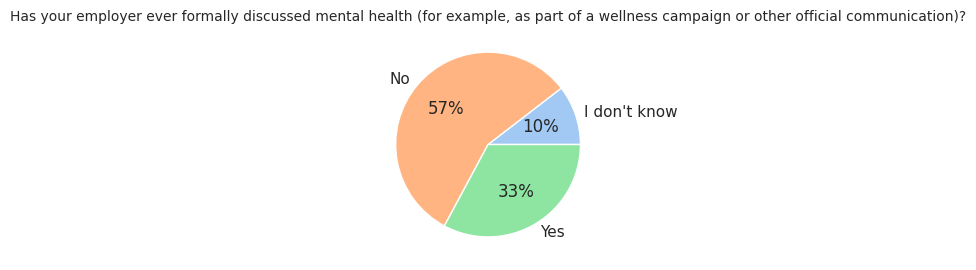

In [171]:
pie45= df5.groupby(['mencion_sm_empleador']).size().plot(kind='pie', autopct='%1.0f%%', title='Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', colors = colors, figsize=(3,3))
pie45.title.set_fontsize(10)

###¿Hablan los trabajadores de su salud mental con sus managers?

In [172]:
df5['conv_sm_empleador'].value_counts()

conv_sm_empleador
0.0    55
1.0    12
Name: count, dtype: int64

In [173]:
df5['conv_sm_empleador'] = df5['conv_sm_empleador'].replace({0.0: 'No', 1.0: 'Yes'})

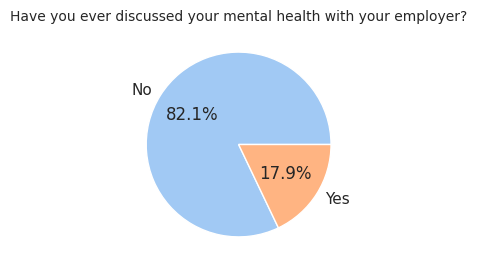

In [174]:
pie55= df5.groupby(['conv_sm_empleador']).size().plot(kind='pie', autopct='%1.1f%%', title='Have you ever discussed your mental health with your employer?', colors = colors, figsize=(3,3))
pie55.title.set_fontsize(10)

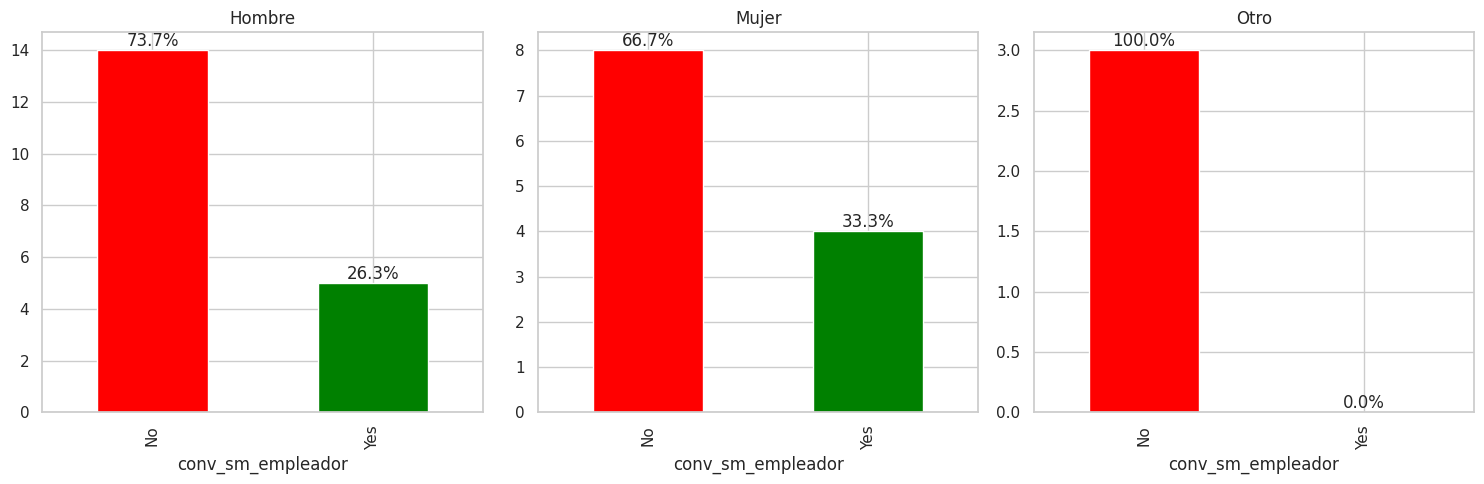

In [175]:
df_filtrado25 = df5[df5['problema_sm_act'].isin(['Yes', 'Possibly'])]

# Agrupar los datos por la variable 'sexo' y sumar los valores 'Yes' y 'No' en la variable 'conv_sm_empleador' para cada grupo
grupo_sexo = df_filtrado25.groupby('sexo')['conv_sm_empleador'].value_counts().unstack().fillna(0)

# Calcular el total de cada grupo de 'sexo'
totals = grupo_sexo.sum(axis=1)

# Graficar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Función para etiquetar las barras con el porcentaje
def etiquetar_barras(ax):
    for patch in ax.patches:
        height = patch.get_height()
        ax.annotate(f'{height / totals[ax.title.get_text()]:.1%}', (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom')

# Gráfico para Hombre
axs[0] = grupo_sexo.loc['Hombre'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[0])
axs[0].set_title('Hombre')
etiquetar_barras(axs[0])

# Gráfico para Mujer
axs[1] = grupo_sexo.loc['Mujer'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[1])
axs[1].set_title('Mujer')
etiquetar_barras(axs[1])

# Gráfico para Otro
axs[2] = grupo_sexo.loc['Otro'].plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[2])
axs[2].set_title('Otro')
etiquetar_barras(axs[2])

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [176]:
df5['conv_sm_antiguo_emp'].value_counts()

conv_sm_antiguo_emp
0.0    36
1.0     6
Name: count, dtype: int64

In [177]:
df5['conv_sm_antiguo_emp'] = df5['conv_sm_antiguo_emp'].replace({0.0: 'No', 1.0: 'Yes'})

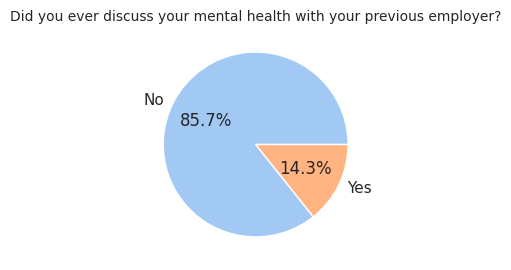

In [178]:
df_filtrado35 = df5[df5['problema_sm_act']=='Yes']
pie65= df5.groupby(['conv_sm_antiguo_emp']).size().plot(kind='pie', autopct='%1.1f%%', title='Did you ever discuss your mental health with your previous employer?', colors = colors, figsize=(3,3))
pie65.title.set_fontsize(10)

In [179]:
# Crear una tabla de contingencia
contingency_table5 = pd.crosstab(df5['conv_sm_empleador'], df5['conv_sm_antiguo_emp'])

# Mostrar la tabla de contingencia
print(contingency_table5)


conv_sm_antiguo_emp  No  Yes
conv_sm_empleador           
No                   31    3
Yes                   5    3


##Salud mental en el ambito personal

In [180]:
df5['entorno_familiar'].value_counts()

entorno_familiar
10    13
5      9
8      8
2      7
6      6
7      5
9      5
4      4
3      4
0      3
1      3
Name: count, dtype: int64

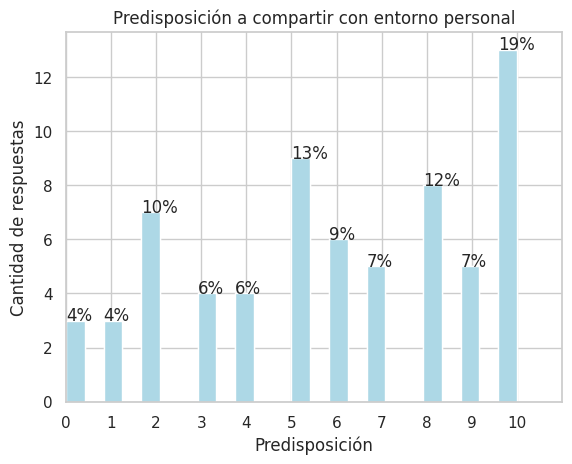

In [181]:
# Calcular los porcentajes
total_respuestas5 = len(df5['entorno_familiar'])
frecuencias, bins, _ = plt.hist(df5['entorno_familiar'], bins=24, color="lightblue")
porcentajes = [(count / total_respuestas5) * 100 for count in frecuencias]

# Graficar el histograma
plt.hist(df5['entorno_familiar'], bins=bins, color="lightblue")
plt.title('Predisposición a compartir con entorno personal')
plt.xlabel('Predisposición')
plt.ylabel('Cantidad de respuestas')

# Establecer los límites y las graduaciones del eje x
plt.xlim(0, 11)
plt.xticks(np.arange(0, 11, step=1))

# Añadir los porcentajes en el gráfico
for i, valor in enumerate(porcentajes):
    if valor > 0:
        plt.annotate(f'{valor:.0f}%', (bins[i], frecuencias[i]))

# Mostrar el gráfico
plt.show()

#Cambio estructural con con 4 variables

In [182]:

# Combinar los DataFrames
dfs = [df1, df2, df3, df4, df5]
df_combined = pd.concat(dfs, keys=['2017', '2018', '2019', '2020', '2021'])
df_combined = df_combined[['beneficio', 'mencion_sm_empleador', 'problema_sm_act', 'entorno_familiar']]

# Transformación de las variables categóricas en numéricas
df_combined['beneficio'] = df_combined['beneficio'].map({'Yes': 1, 'No': 0, "I don't know": 0, 'Not elegible for coverage/NA': 0})
df_combined['mencion_sm_empleador'] = df_combined['mencion_sm_empleador'].map({'Yes': 1, 'No': 0, "Don't Know": 0})
df_combined['problema_sm_act'] = df_combined['problema_sm_act'].map({'Yes': 1, 'No': 0, "I don't know": 0.5, 'possibly': 0.75})

df_combined = df_combined.dropna(how='any')

# División en dos subgrupos: antes y después de 2020
df_before_2020 = df_combined.loc[:'2019']
df_after_2020 = df_combined.loc['2020':]

# Ajuste de los modelos de regresión
X1 = df_before_2020[['beneficio', 'mencion_sm_empleador', 'problema_sm_act']]
y1 = df_before_2020['entorno_familiar']

X2 = df_after_2020[['beneficio', 'mencion_sm_empleador', 'problema_sm_act']]
y2 = df_after_2020['entorno_familiar']

model1 = sm.OLS(y1, sm.add_constant(X1)).fit()
model2 = sm.OLS(y2, sm.add_constant(X2)).fit()

# Ajuste del modelo a toda la serie temporal
X = df_combined[['beneficio', 'mencion_sm_empleador', 'problema_sm_act']]
y = df_combined['entorno_familiar']
model_full = sm.OLS(y, sm.add_constant(X)).fit()

# Estadístico F para el test de Chow
RSS_full = np.sum(model_full.resid**2)
RSS1 = np.sum(model1.resid**2)
RSS2 = np.sum(model2.resid**2)
k = X.shape[1]  # número de parámetros en la regresión (constante + pendiente)

F_chow = ((RSS_full - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (len(df_combined) - 2*k))

# P-valor asociado
p_value = 1 - f.cdf(F_chow, k, len(df_combined) - 2*k)

# Resultados
print(f'Estadístico F: {F_chow}')
print(f'P-valor: {p_value}')

Estadístico F: 2.90403687692126
P-valor: 0.03416377461700615


# Bondad del ajuste modelo con 4 variables

In [183]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       entorno_familiar   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     16.07
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           5.00e-10
Time:                        23:38:20   Log-Likelihood:                -1301.6
No. Observations:                 558   AIC:                             2611.
Df Residuals:                     554   BIC:                             2629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6656 

In [184]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       entorno_familiar   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     6.022
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           0.000886
Time:                        23:38:20   Log-Likelihood:                -220.45
No. Observations:                  92   AIC:                             448.9
Df Residuals:                      88   BIC:                             459.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.5816 

In [185]:
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:       entorno_familiar   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     19.92
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.34e-12
Time:                        23:38:20   Log-Likelihood:                -1526.8
No. Observations:                 650   AIC:                             3062.
Df Residuals:                     646   BIC:                             3079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6360 

#Cambio estructural con 5 variables

In [186]:

# Combinar los DataFrames
dfs = [df1, df2, df3, df4, df5]
df_combined = pd.concat(dfs, keys=['2017', '2018', '2019', '2020', '2021'])
df_combined = df_combined[['beneficio', 'mencion_sm_empleador', 'problema_sm_act', 'entorno_familiar','conv_sm_empleador']]

# Transformación de las variables categóricas en numéricas
df_combined['beneficio'] = df_combined['beneficio'].map({'Yes': 1, 'No': 0, "I don't know": 0, 'Not elegible for coverage/NA': 0})
df_combined['mencion_sm_empleador'] = df_combined['mencion_sm_empleador'].map({'Yes': 1, 'No': 0, "Don't Know": 0})
df_combined['problema_sm_act'] = df_combined['problema_sm_act'].map({'Yes': 1, 'No': 0, "I don't know": 0.5, 'possibly': 0.75})
df_combined['conv_sm_empleador'] = df_combined['conv_sm_empleador'].map({'Yes': 1, 'No': 0})

df_combined = df_combined.dropna(how='any')

# División en dos subgrupos: antes y después de 2020
df_before_2020 = df_combined.loc[:'2019']
df_after_2020 = df_combined.loc['2020':]

# Ajuste de los modelos de regresión
X1 = df_before_2020[['beneficio', 'mencion_sm_empleador', 'problema_sm_act','conv_sm_empleador']]
y1 = df_before_2020['entorno_familiar']

X2 = df_after_2020[['beneficio', 'mencion_sm_empleador', 'problema_sm_act','conv_sm_empleador']]
y2 = df_after_2020['entorno_familiar']

model1 = sm.OLS(y1, sm.add_constant(X1)).fit()
model2 = sm.OLS(y2, sm.add_constant(X2)).fit()

# Ajuste del modelo a toda la serie temporal
X = df_combined[['beneficio', 'mencion_sm_empleador', 'problema_sm_act','conv_sm_empleador']]
y = df_combined['entorno_familiar']
model_full = sm.OLS(y, sm.add_constant(X)).fit()

# Estadístico F para el test de Chow
RSS_full = np.sum(model_full.resid**2)
RSS1 = np.sum(model1.resid**2)
RSS2 = np.sum(model2.resid**2)
k = X.shape[1]  # número de parámetros en la regresión (constante + pendiente)

F_chow = ((RSS_full - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (len(df_combined) - 2*k))

# P-valor asociado
p_value = 1 - f.cdf(F_chow, k, len(df_combined) - 2*k)

# Resultados
print(f'Estadístico F: {F_chow}')
print(f'P-valor: {p_value}')

Estadístico F: 2.348969991192252
P-valor: 0.05309071920148778


# Bondad del ajuste modelo con 5 variables

In [187]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       entorno_familiar   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     17.66
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.18e-13
Time:                        23:38:20   Log-Likelihood:                -1291.4
No. Observations:                 558   AIC:                             2593.
Df Residuals:                     553   BIC:                             2614.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.5495 

In [188]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       entorno_familiar   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.480
Date:                Thu, 20 Jun 2024   Prob (F-statistic):            0.00244
Time:                        23:38:20   Log-Likelihood:                -220.42
No. Observations:                  92   AIC:                             450.8
Df Residuals:                      87   BIC:                             463.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.5700 

In [189]:
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:       entorno_familiar   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     20.26
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           9.79e-16
Time:                        23:38:20   Log-Likelihood:                -1517.0
No. Observations:                 650   AIC:                             3044.
Df Residuals:                     645   BIC:                             3066.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.5383 

#gráficos de disposición a compartir con el entorno familiar

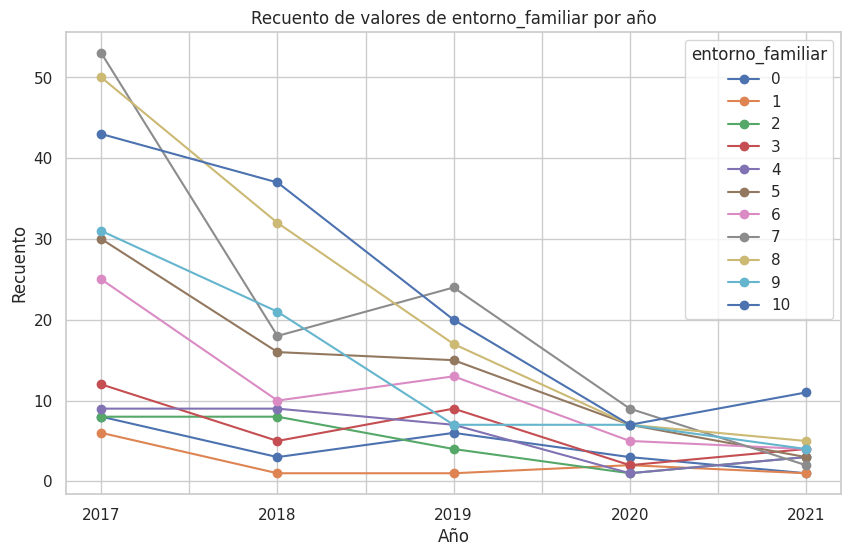

In [190]:
counts = df_combined.groupby(level=0)['entorno_familiar'].value_counts()

pivot_counts = counts.unstack(fill_value=0)

pivot_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Recuento')
plt.title('Recuento de valores de entorno_familiar por año')
plt.legend(title='entorno_familiar')
plt.show()

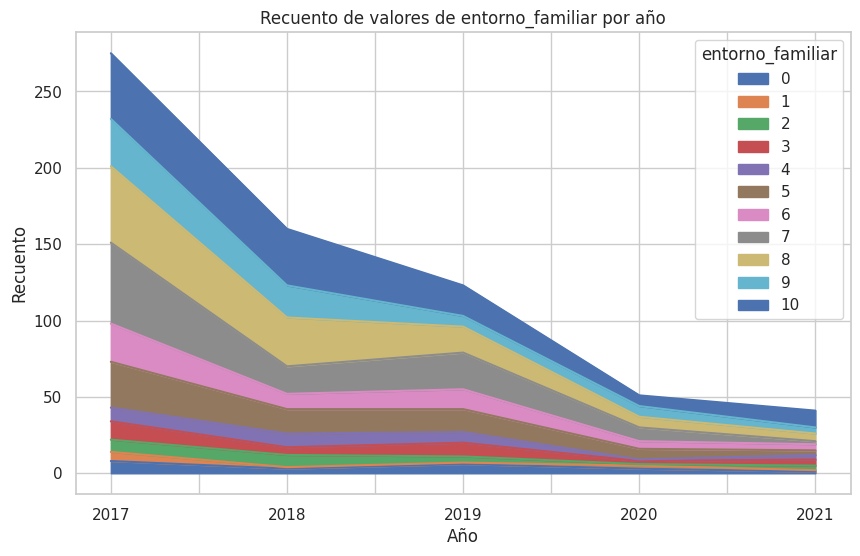

In [191]:
pivot_counts.plot(kind='area', stacked=True, figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Recuento')
plt.title('Recuento de valores de entorno_familiar por año')
plt.legend(title='entorno_familiar')
plt.show()

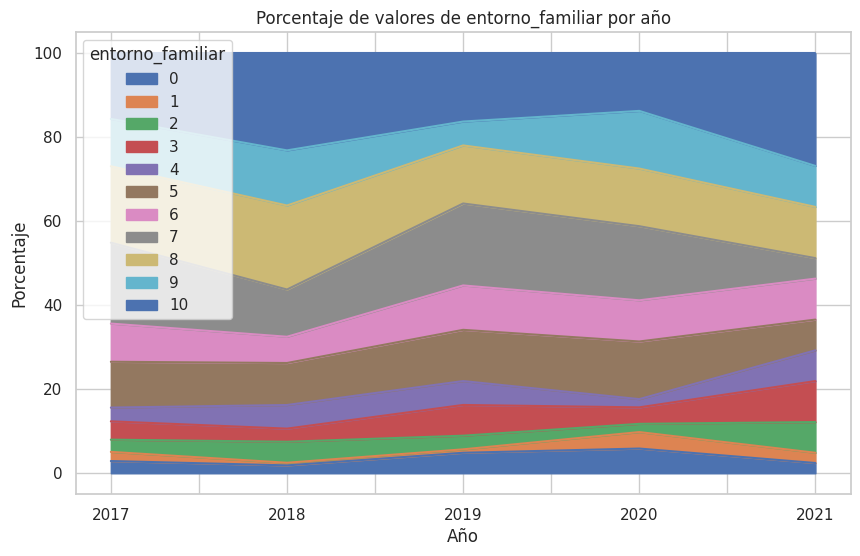

In [192]:
pivot_counts = counts.unstack(fill_value=0)

# Total de respuestas para cada año
total_responses = pivot_counts.sum(axis=1)

# Porcentaje de cada valor respecto al total de respuestas
percentage_counts = pivot_counts.div(total_responses, axis=0) * 100

# Gráfico de áreas para representar los datos de manera relativa
percentage_counts.plot(kind='area', stacked=True, figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de valores de entorno_familiar por año')
plt.legend(title='entorno_familiar', loc='upper left')
plt.show()